In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib.pyplot as plt

In [3]:
plt.style.use('presentation-dark.mplstyle')

In [4]:
from fitting_scripts import *

/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)


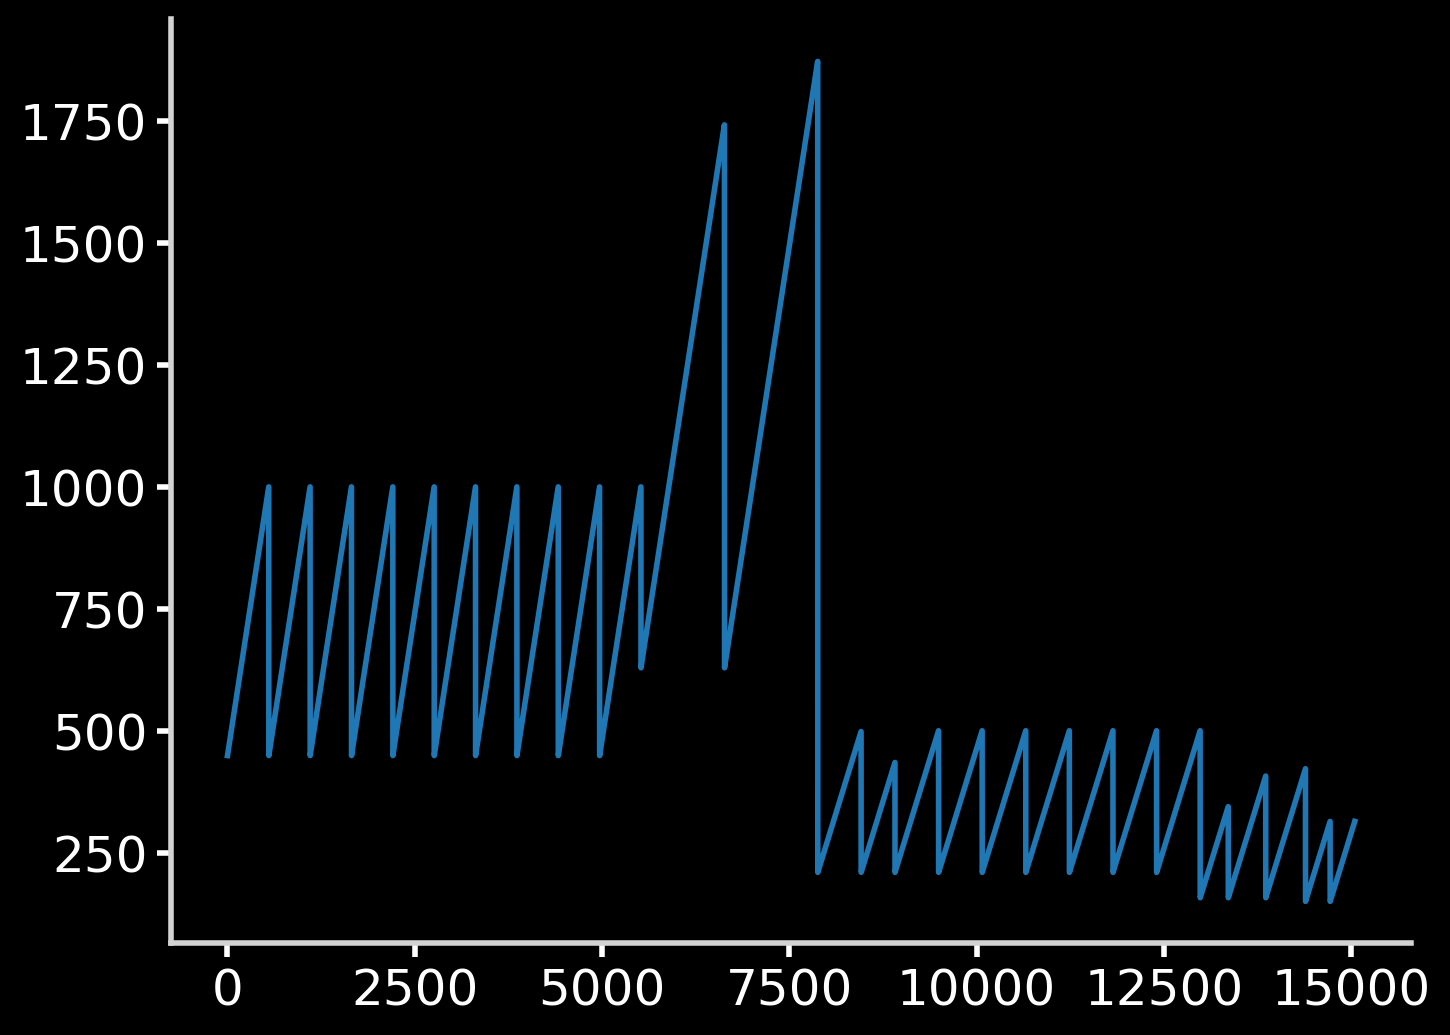

In [5]:
# "pt_df" is a pandas.DataFrame collecting relevant physical quantity time series from
# all simulations into a long-form array
# it will not be straightforward to bundle each model's points from this data
pt_df = pd.read_pickle('points_all.p')
pt_logdf = np.log10(pt_df)

# one can bundle data for each model based on "time_code" field
# that is increasing within each model's data output
plt.plot(pt_df['time_code'])

In [6]:
# "qdset" is a xarray.Dataset storing the (16, 50, 84) percentile values and mean and std for each model's time series into an effectively 3D array.
with xr.open_dataarray('percentiles_all.nc') as qdset:
    # get median values and convert it into pandas.DataFrame
    mid_df = qdset.sel(q='50').to_dataset(dim='variable').drop('q').to_dataframe()
    mid_logdf = np.log10(mid_df)

In [7]:
# these are all quantity name stored in this data
# we are mostly interested in fitting "Yxxx" as a function of "W" and "Zgas"
print(qdset['variable'])

<xarray.DataArray 'variable' (variable: 97)>
array(['Ptot', 'Ytot', 'Ptot_top', 'dPtot', 'Pturb', 'Yturb', 'Pturb_top',
       'dPturb', 'Pth', 'Yth', 'Pth_top', 'dPth', 'Pimag', 'Ymag', 'Pimag_top',
       'dPimag', 'oPimag', 'oYmag', 'oPimag_top', 'doPimag', 'dYmag',
       'dPimag_top', 'ddPimag', 'Prad', 'Yrad', 'Prad_top', 'dPrad',
       'Ptot_hot', 'Ytot_hot', 'Ptot_hot_top', 'dPtot_hot', 'Pturb_hot',
       'Yturb_hot', 'Pturb_hot_top', 'dPturb_hot', 'Pth_hot', 'Yth_hot',
       'Pth_hot_top', 'dPth_hot', 'Pimag_hot', 'Ymag_hot', 'Pimag_hot_top',
       'dPimag_hot', 'oPimag_hot', 'oYmag_hot', 'oPimag_hot_top',
       'doPimag_hot', 'dYmag_hot', 'dPimag_hot_top', 'ddPimag_hot', 'Prad_hot',
       'Yrad_hot', 'Prad_hot_top', 'dPrad_hot', 'Ynonth', 'nH',
       'sigma_eff_mid', 'sigma_eff', 'sigma_turb_mid', 'sigma_turb',
       'sigma_th_mid', 'sigma_th', 'H', 'PDE_whole_approx',
       'PDE_2p_avg_approx', 'PDE_2p_mid_approx', 'PDE_whole_approx_sp',
       'PDE_2p_avg_approx_sp

In [8]:
qdset['name']

<xarray.DataArray 'name' (name: 26)>
array(['R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps0.0',
       'R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps0.0',
       'R8_8pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy2048.eps0.0',
       'R8_8pc_NCR.full.b10.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0',
       'R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0',
       'R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0',
       'R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0',
       'R8_8pc_NCR.full.b1.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0',
       'R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0',
       'R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0',
       'LGR8_8pc_NCR_S05.full.b10.v3.iCR5.Zg1.Zd1.xy4096.eps0.0',
       'LGR8_8pc_NCR_S05.full.b10.v3.iCR5.Zg0.1.Zd0.1.xy8192.eps0.0',
       'LGR4_4pc_NCR_S100.full.b1.v3.iCR5.Zg1.Zd1.xy1024.eps1.e-8.rstZ01',
       'LGR4_4pc_NCR_S100.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps1.e-8',
       'LGR4_4pc_NCR_S100.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps1.e-8',
       'LGR4_4pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy1024.eps1.e-8',
       'LGR4_4pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps1.e-8',
       'LGR4_4pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps1.e-8',
       'LGR4_4pc_NCR.full.b1.v3.iCR4.Zg0.3.Zd0.3.xy2048.eps1.e-8',
       'LGR4_4pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps1.e-8',
       'LGR4_4pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.025.xy2048.eps1.e-8',
       'LGR2_4pc_NCR_S150.full.b2.Om02.v3.iCR5.Zg1.Zd1.xy1024.eps1.e-8.rstZ01',
       'LGR2_4pc_NCR_S150.full.b2.Om02.v3.iCR5.Zg1.Zd1.xy1024.eps1.e-8',
       'LGR2_4pc_NCR_S150.full.b2.Om02.v3.iCR5.Zg0.1.Zd0.1.xy2048.eps1.e-8',
       'LGR2_4pc_NCR_S150.full.b2.Om01.q0.v3.iCR5.Zg0.1.Zd0.1.xy2048.eps1.e-8',
       'LGR2_4pc_NCR_S150.full.b2.Om01.q0.v3.iCR5.Zg1.Zd1.xy1024.eps1.e-8'],
      dtype=object)
Coordinates:
  * name     (name) object 'R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps...

In [9]:
# nsel=[]
# for n in qdset['name'].data:
#     if ('R8_8pc_NCR.full.b10' in n or
#         'LGR4_4pc_NCR.full.b10' in n or
#         'rstZ01' in n):
#         print(n)
#     else:
#         nsel.append(n)

In [10]:
# qdset = qdset.sel(name=nsel)

# fitting with mean and std

In [11]:
from matplotlib.lines import Line2D

In [12]:
# We are fitting variables as a function of "W" and "Zgas"
# I set the parameter range of interest (in log scale) here
Zmin=-1.3
Zmax=0.3
Wmin=2.7
Wmax=6.3

In [40]:
# setup figure output directory
outdir = './lowZ-figures-talk/'
os.makedirs(outdir,exist_ok=True)
# outdir = '/tigress/changgoo/public_html/TIGRESS-NCR/lowZ-figures/'

Beta: [4.17345708 1.18929957 0.0197935 ]
Beta Std Error: [0.03132651 0.02678911 0.03669419]
Beta Covariance: [[ 0.31219377 -0.154523    0.24760896]
 [-0.154523    0.22830564 -0.04119495]
 [ 0.24760896 -0.04119495  0.42834613]]
Residual Variance: 0.003143401215805825
Inverse Condition #: 0.0417098205353623
Reason(s) for Halting:
  Sum of squares convergence
L1 : 0.13992886305821267
L2 : 0.19276914269747317


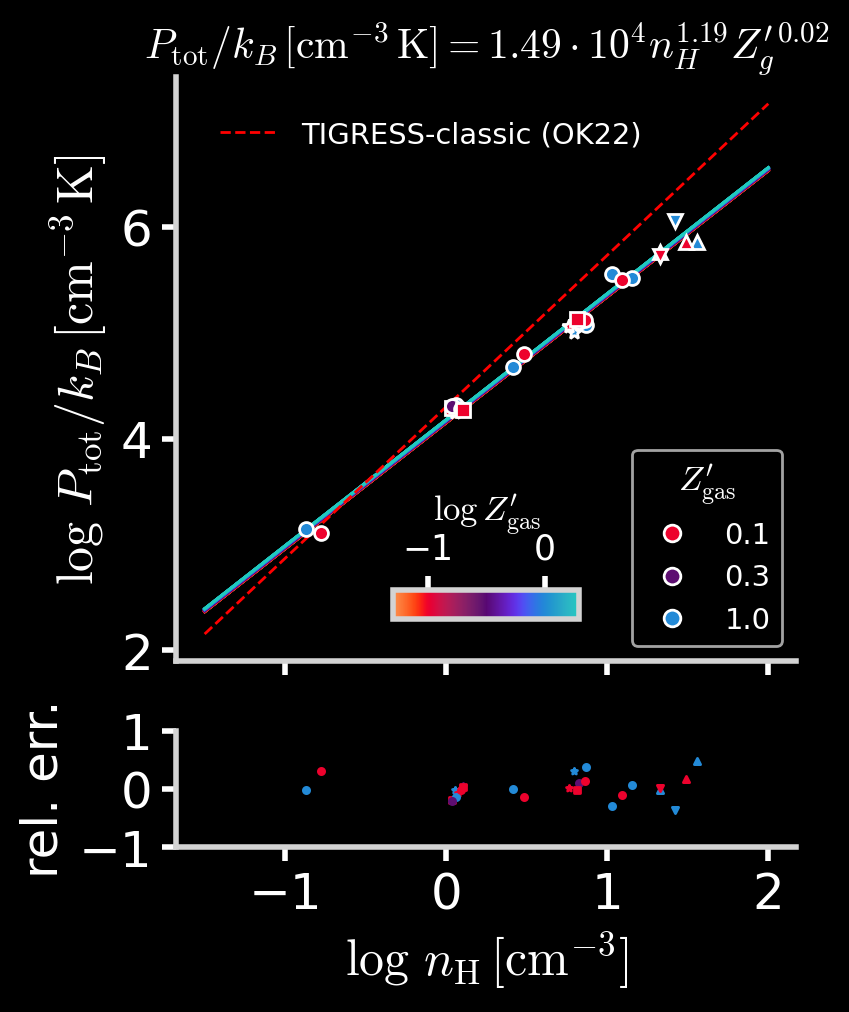

In [41]:
# Figure for the effective Equation of State (eEOS)
fig,axes = plt.subplots(2,1,sharex='col',figsize=(4,5),gridspec_kw=dict(height_ratios=[1,0.2]))

# set field names for x-axes and yaxis
# here we fit Ptot as a function of nH and Zgas
x1,x2,yf=['nH','Zgas','Ptot']

# linear regression
odr_out = fit_odr(qdset,xf1=x1,xf2=x2,yf=yf)
# construct model (not the x1-axis is not W and the parameter range is changed)
model_dset = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,Wmin=-1.5,Wmax=2,dims=[x2,x1])

# plot simulation data along with fitting result
plt.sca(axes[0])
# write fitting result as the axis title
a=odr_out.beta[1]
b=odr_out.beta[2]
Y0=10**odr_out.beta[0]
tit=labels[yf]+f'$={scifmt(Y0)} n_H^{{{a:5.2f}}}{{Z_g^\\prime}}^{{{b:5.2f}}}$'
plt.title(tit,fontsize='small')

# call plotting script
plot_fitting_mean(qdset,model_dset,x1,yf,legend=4,colorbar=8,model=True)
# plot all data as grey dots
# plt.plot(pt_df[x1],pt_df[yf],'.',color='grey',alpha=0.1,mew=0,zorder=-1)
plt.xlabel('')

# plot residual compared with the fitting result
plt.sca(axes[1])
plot_fitting_mean(qdset,model_dset,x1,yf,residual=True,model=True)

# add reference line from the previous result (Ostriker & Kim 2022 Eq 27, Figure 14)
nH=model_dset.nH.data
plt.sca(axes[0])
plt.plot(nH,4.3+nH*1.43,ls='--',color='r',lw=1)
leg1=plt.gca().get_legend()
custom_lines2 = [Line2D([0], [0], ls = '--', color='r', lw=1)]
leg2 = plt.legend(custom_lines2,['TIGRESS-classic (OK22)'],loc=2,borderpad=1,fontsize='xx-small',frameon=False)
plt.gca().add_artist(leg1)

# decorate axis
fig.axes[-1].xaxis.set_ticks_position('top')
fig.axes[-1].xaxis.set_label_position('top')
plt.setp(fig.axes[-1].get_xticklabels(),'fontsize','x-small')
fig.axes[-1].set_xlabel(fig.axes[-1].get_xlabel(),fontsize='x-small')

# save figure
plt.savefig(os.path.join(outdir,'eEOS_fit.png'),bbox_inches='tight')

In [42]:
qdset.to_dataset('variable')

<xarray.Dataset>
Dimensions:               (name: 26, q: 5)
Coordinates:
  * name                  (name) object 'R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg1.Z...
  * q                     (q) object '16' '50' '84' 'mean' 'std'
Data variables: (12/97)
    Ptot                  (name, q) float64 ...
    Ytot                  (name, q) float64 ...
    Ptot_top              (name, q) float64 ...
    dPtot                 (name, q) float64 ...
    Pturb                 (name, q) float64 ...
    Yturb                 (name, q) float64 ...
    ...                    ...
    tdep10                (name, q) float64 ...
    tdep40                (name, q) float64 ...
    tdep100               (name, q) float64 ...
    Zgas                  (name, q) float64 ...
    Zdust                 (name, q) float64 ...
    PDE                   (name, q) float64 ...

Beta: [0.60903586 0.11697894 0.04283701]
Beta Std Error: [0.05109169 0.01017369 0.01596404]
Beta Covariance: [[ 1.83493178 -0.35659102  0.15444818]
 [-0.35659102  0.07275722 -0.0126735 ]
 [ 0.15444818 -0.0126735   0.1791451 ]]
Residual Variance: 0.0014225926950423625
Inverse Condition #: 0.0032222906221710383
Reason(s) for Halting:
  Sum of squares convergence
L1 : 0.0634758879938327
L2 : 0.0816053528332032


Text(0.5, 0, '$\\log$$Z_{\\rm gas}^\\prime$')

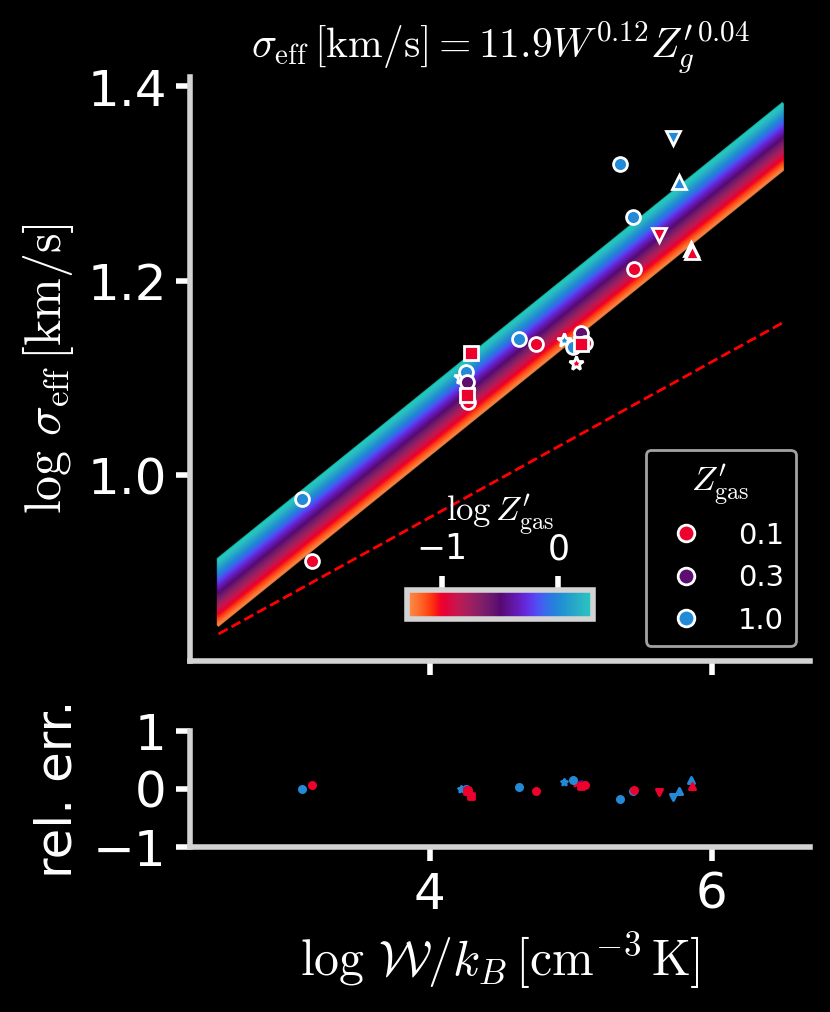

In [43]:
# Figure for the effective Equation of State (eEOS)
fig,axes = plt.subplots(2,1,sharex='col',figsize=(4,5),gridspec_kw=dict(height_ratios=[1,0.2]))

# set field names for x-axes and yaxis
# here we fit Ptot as a function of nH and Zgas
x1,x2,yf=['W','Zgas','sigma_eff']

# linear regression
odr_out = fit_odr(qdset,xf1=x1,xf2=x2,yf=yf)
# construct model (not the x1-axis is not W and the parameter range is changed)
model_dset = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,dims=[x2,x1])

# plot simulation data along with fitting result
plt.sca(axes[0])
# write fitting result as the axis title
a=odr_out.beta[1]
b=odr_out.beta[2]
Y0=10**odr_out.beta[0]*1.e4**a
tit=labels[yf]+f'$={scifmt(Y0)} W^{{{a:5.2f}}}{{Z_g^\\prime}}^{{{b:5.2f}}}$'
plt.title(tit,fontsize='small')

# call plotting script
plot_fitting_mean(qdset,model_dset,x1,yf,legend=4,colorbar=8,model=True)
# plot all data as grey dots
# plt.plot(pt_df[x1],pt_df[yf],'.',color='grey',alpha=0.1,mew=0,zorder=-1)
plt.xlabel('')

# plot residual compared with the fitting result
plt.sca(axes[1])
plot_fitting_mean(qdset,model_dset,x1,yf,residual=True,model=True)

# add reference line from the previous result (Ostriker & Kim 2022 Eq 27, Figure 14)
W=model_dset.W.data
plt.sca(axes[0])
plt.plot(W,np.log10(9.05)+0.08*(W-4),ls='--',color='r',lw=1)
# leg1=plt.gca().get_legend()
# custom_lines2 = [Line2D([0], [0], ls = '--', color='r', lw=1)]
# leg2 = plt.legend(custom_lines2,['TIGRESS-classic (OK22)'],loc=2,borderpad=1,fontsize='xx-small',frameon=False)
# plt.gca().add_artist(leg1)

# decorate axis
fig.axes[-1].xaxis.set_ticks_position('top')
fig.axes[-1].xaxis.set_label_position('top')
plt.setp(fig.axes[-1].get_xticklabels(),'fontsize','x-small')
fig.axes[-1].set_xlabel(fig.axes[-1].get_xlabel(),fontsize='x-small')

# save figure
# plt.savefig(os.path.join(outdir,'eEOS_fit.png'),bbox_inches='tight')

In [44]:
12*100**0.22

33.050744440058

Beta: [-0.10158242  1.03647142  0.05385291]
Beta Std Error: [0.08794087 0.01751203 0.02745631]
Beta Covariance: [[ 3.75937301 -0.73063401  0.31605986]
 [-0.73063401  0.14907566 -0.0259482 ]
 [ 0.31605986 -0.0259482   0.36645293]]
Residual Variance: 0.002057150448995789
Inverse Condition #: 0.0032198849051120384
Reason(s) for Halting:
  Sum of squares convergence
L1 : 0.14068531068989745
L2 : 0.26567664628139515
Beta: [-0.03296739  0.99720348  0.00944245]
Beta Std Error: [0.07679376 0.01529204 0.02397988]
Beta Covariance: [[ 3.60855221 -0.7013059   0.30352475]
 [-0.7013059   0.14309094 -0.02492413]
 [ 0.30352475 -0.02492413  0.35186414]]
Residual Variance: 0.0016342513801973558
Inverse Condition #: 0.0032203687894681917
Reason(s) for Halting:
  Sum of squares convergence
L1 : 0.12892590851699676
L2 : 0.15235155971145461
Beta: [ 0.35201934  0.91736117 -0.05201662]
Beta Std Error: [0.05599656 0.01115025 0.01749089]
Beta Covariance: [[ 3.33487964 -0.6480861   0.2807236 ]
 [-0.6480861   0.1

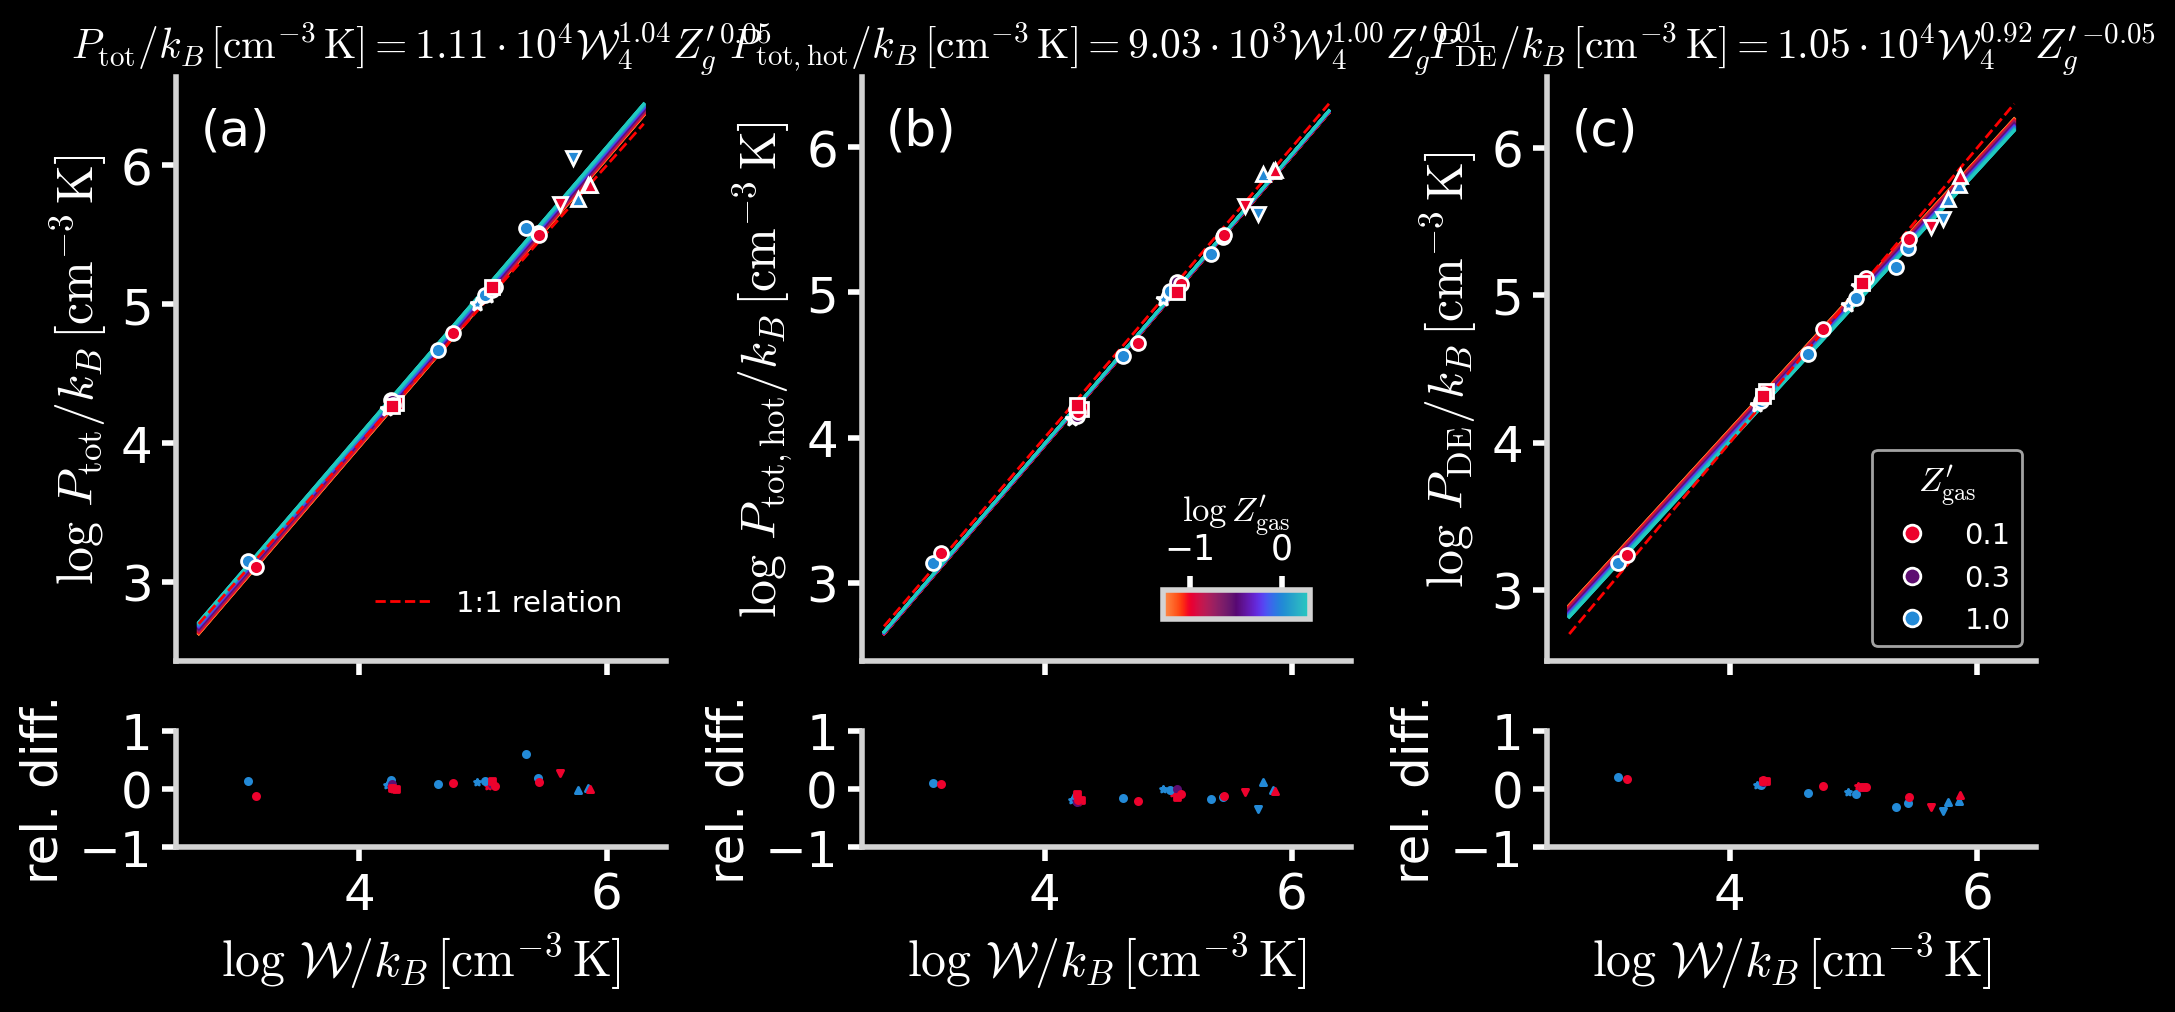

In [45]:
# Figure for
# (a) vertical dynamical equilibrium (Ptot vs W)
# (b) pressure equilibrium between phases (Ptot_hot vs W)
# (c) comparison with analytic weight estimator (PDE from Equation 7 in Ostriker & Kim 2022 vs W)
fig,axes_ = plt.subplots(2,3,sharex='col',figsize=(12,5),
                         gridspec_kw=dict(height_ratios=[1,0.2],wspace=0.4,hspace=0.2))

# set field names for x-axes
x1,x2=['W','Zgas']
for yf,axes in zip(['Ptot','Ptot_hot','PDE_2p_avg_approx'],axes_.T):
    # linear regression
    odr_out = fit_odr(qdset,xf1=x1,xf2=x2,yf=yf)
    # construct model (not the x1-axis is not W and the parameter range is changed)
    model_dset = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,Wmin=Wmin,Wmax=Wmax,dims=[x2,x1])

    # plot simulation data along with fitting result
    plt.sca(axes[0])

    # write fitting result as the axis title
    a=odr_out.beta[1]
    b=odr_out.beta[2]
    Y0=10**odr_out.beta[0]*1.e4**a
    l = labels[yf] if yf in labels else labels['PDE']
    tit=l+f'$={scifmt(Y0)} \\mathcal{{W}}_4^{{{a:5.2f}}}{{Z_g^\\prime}}^{{{b:5.2f}}}$'
    plt.title(tit,fontsize='small')

    # call plotting script
    sm = plot_fitting_mean(qdset,model_dset,x1,yf,
                             legend=4 if yf.startswith('PDE') else 0,
                             colorbar=4 if yf.startswith('Ptot_hot') else 0,
                             model=True)
    # plot one-to-one line
    plt.plot(model_dset.W,model_dset.W,lw=1,ls='--',color='r')
    # plot all data points as grey dots
    # plt.plot(pt_df[x1],pt_df[yf],'.',color='grey',alpha=0.1,mew=0,zorder=-1)
    plt.xlabel('')
    # plt.ylim(3.e2,3.e6)

    # plot residual by comparing x and y field (not comparing with model; model = False)
    plt.sca(axes[1])
    plot_fitting_mean(qdset,model_dset,x1,yf,residual=True,
                      model=False)

# decorate figure
fig.axes[-1].xaxis.set_ticks_position('top')
fig.axes[-1].xaxis.set_label_position('top')
plt.setp(fig.axes[-1].get_xticklabels(),'fontsize','x-small')
fig.axes[-1].set_xlabel(fig.axes[-1].get_xlabel(),fontsize='x-small')

# add custom legend
plt.sca(axes_[0,0])
custom_lines2 = [Line2D([0], [0], ls = '--', color='r', lw=1)]
leg2 = plt.legend(custom_lines2,['1:1 relation'],loc=4,borderpad=1,fontsize='xx-small',frameon=False)

# add panel label (a), (b), ...
add_panel_labels(axes_[0,:])

# save figure
plt.savefig(os.path.join(outdir,'PW_fit.png'),bbox_inches='tight')

Beta: [-0.10158242  1.03647142  0.05385291]
Beta Std Error: [0.08794087 0.01751203 0.02745631]
Beta Covariance: [[ 3.75937301 -0.73063401  0.31605986]
 [-0.73063401  0.14907566 -0.0259482 ]
 [ 0.31605986 -0.0259482   0.36645293]]
Residual Variance: 0.002057150448995789
Inverse Condition #: 0.0032198849051120384
Reason(s) for Halting:
  Sum of squares convergence
L1 : 0.14068531068989745
L2 : 0.26567664628139515
Beta: [-0.03296739  0.99720348  0.00944245]
Beta Std Error: [0.07679376 0.01529204 0.02397988]
Beta Covariance: [[ 3.60855221 -0.7013059   0.30352475]
 [-0.7013059   0.14309094 -0.02492413]
 [ 0.30352475 -0.02492413  0.35186414]]
Residual Variance: 0.0016342513801973558
Inverse Condition #: 0.0032203687894681917
Reason(s) for Halting:
  Sum of squares convergence
L1 : 0.12892590851699676
L2 : 0.15235155971145461
Beta: [ 0.26128429  0.94515419 -0.03040737]
Beta Std Error: [0.03128949 0.00623044 0.00977559]
Beta Covariance: [[ 3.42374129 -0.66534288  0.28823443]
 [-0.66534288  0.1

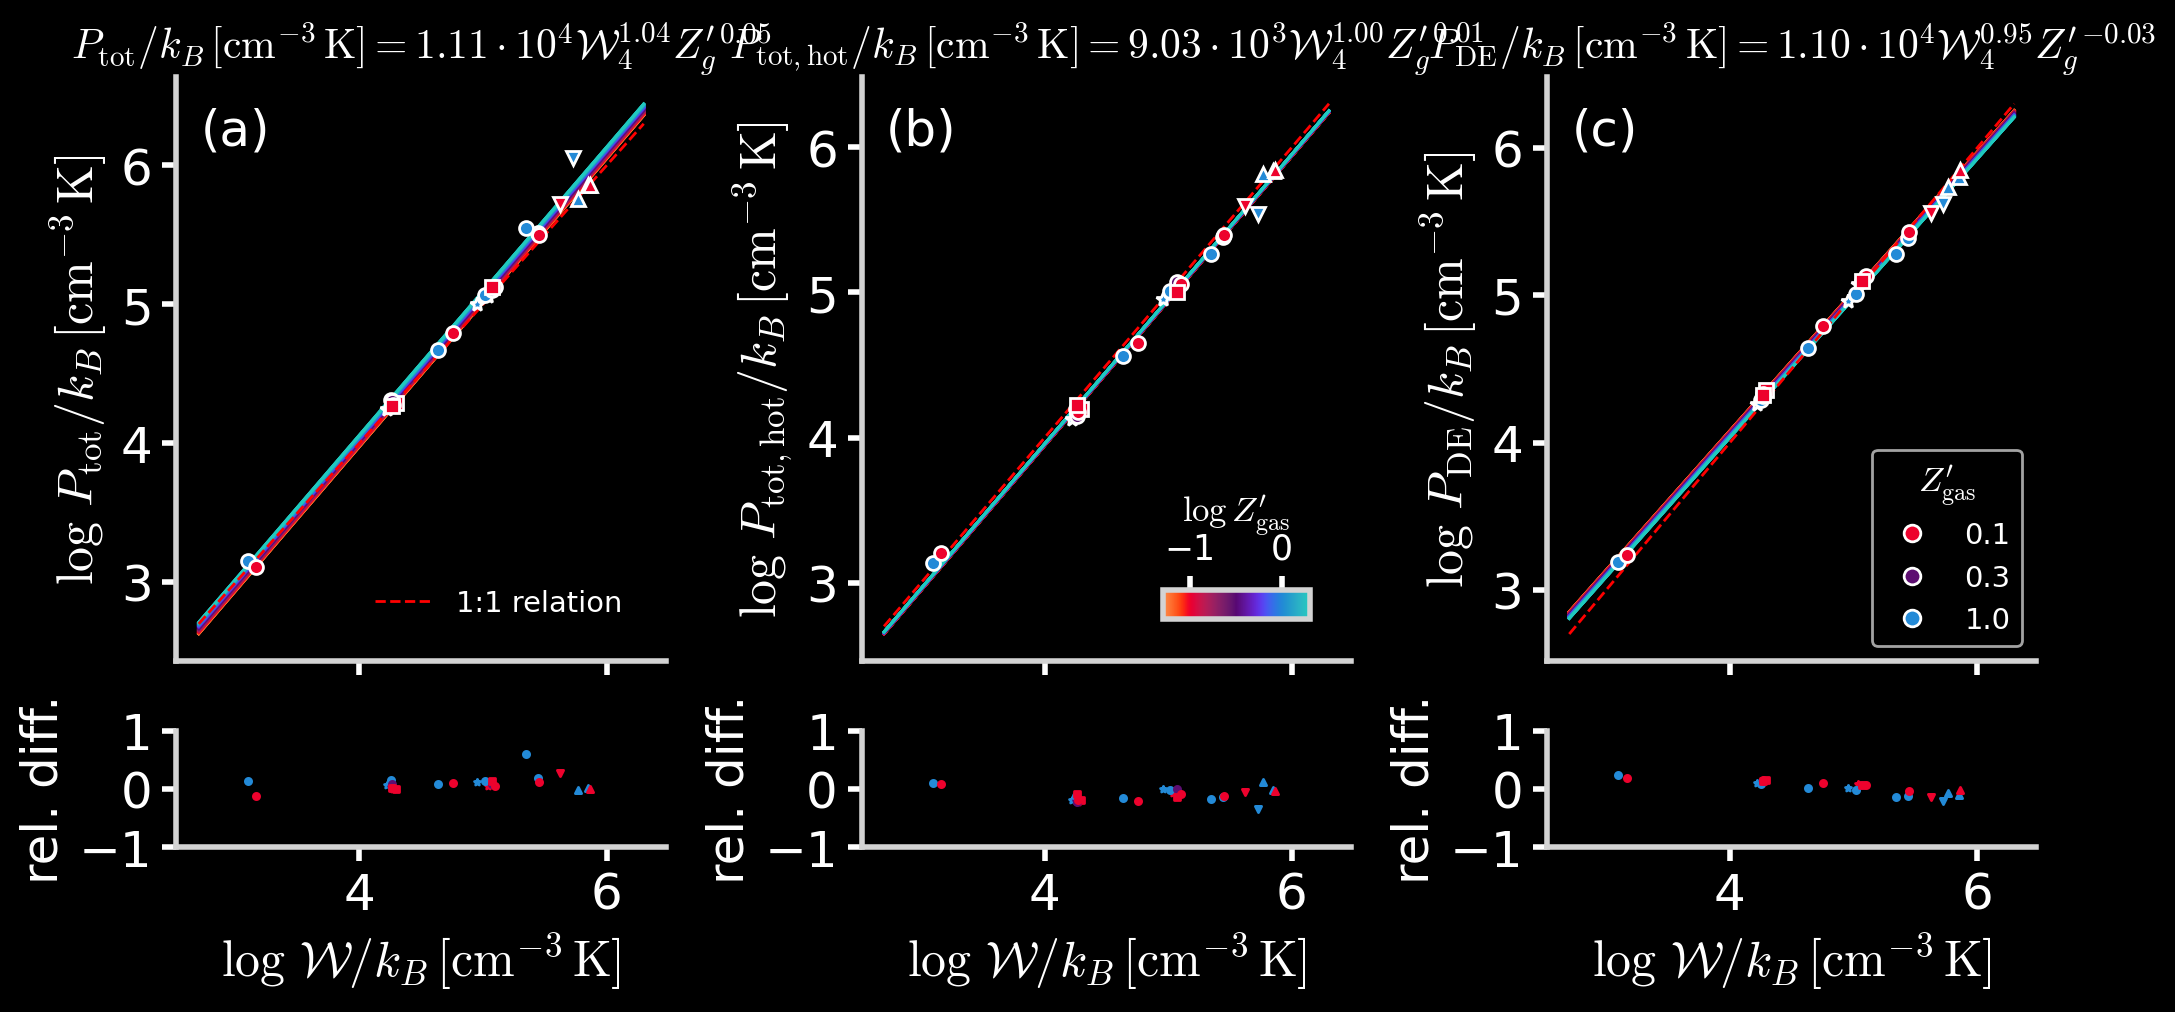

In [46]:
# Figure for
# (a) vertical dynamical equilibrium (Ptot vs W)
# (b) pressure equilibrium between phases (Ptot_hot vs W)
# (c) comparison with analytic weight estimator (PDE from Equation 7 in Ostriker & Kim 2022 vs W)
fig,axes_ = plt.subplots(2,3,sharex='col',figsize=(12,5),
                         gridspec_kw=dict(height_ratios=[1,0.2],wspace=0.4,hspace=0.2))

# set field names for x-axes
x1,x2=['W','Zgas']
for yf,axes in zip(['Ptot','Ptot_hot','PDE_2p_avg_approx_sp'],axes_.T):
    # linear regression
    odr_out = fit_odr(qdset,xf1=x1,xf2=x2,yf=yf)
    # construct model (not the x1-axis is not W and the parameter range is changed)
    model_dset = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,Wmin=Wmin,Wmax=Wmax,dims=[x2,x1])

    # plot simulation data along with fitting result
    plt.sca(axes[0])

    # write fitting result as the axis title
    a=odr_out.beta[1]
    b=odr_out.beta[2]
    Y0=10**odr_out.beta[0]*1.e4**a
    l = labels[yf] if yf in labels else labels['PDE']
    tit=l+f'$={scifmt(Y0)} \\mathcal{{W}}_4^{{{a:5.2f}}}{{Z_g^\\prime}}^{{{b:5.2f}}}$'
    plt.title(tit,fontsize='small')

    # call plotting script
    sm = plot_fitting_mean(qdset,model_dset,x1,yf,
                             legend=4 if yf.startswith('PDE') else 0,
                             colorbar=4 if yf.startswith('Ptot_hot') else 0,
                             model=True)
    # plot one-to-one line
    plt.plot(model_dset.W,model_dset.W,lw=1,ls='--',color='r')
    # plot all data points as grey dots
    # plt.plot(pt_df[x1],pt_df[yf],'.',color='grey',alpha=0.1,mew=0,zorder=-1)
    plt.xlabel('')
    # plt.ylim(3.e2,3.e6)

    # plot residual by comparing x and y field (not comparing with model; model = False)
    plt.sca(axes[1])
    plot_fitting_mean(qdset,model_dset,x1,yf,residual=True,
                      model=False)

# decorate figure
fig.axes[-1].xaxis.set_ticks_position('top')
fig.axes[-1].xaxis.set_label_position('top')
plt.setp(fig.axes[-1].get_xticklabels(),'fontsize','x-small')
fig.axes[-1].set_xlabel(fig.axes[-1].get_xlabel(),fontsize='x-small')

# add custom legend
plt.sca(axes_[0,0])
custom_lines2 = [Line2D([0], [0], ls = '--', color='r', lw=1)]
leg2 = plt.legend(custom_lines2,['1:1 relation'],loc=4,borderpad=1,fontsize='xx-small',frameon=False)

# add panel label (a), (b), ...
add_panel_labels(axes_[0,:])

# save figure
plt.savefig(os.path.join(outdir,'PW_fit_sp.png'),bbox_inches='tight')

Beta: [ 4.76023829 -0.35194862 -0.32422183]
Beta Std Error: [0.23024856 0.04588067 0.07214993]
Beta Covariance: [[ 2.22381057 -0.43243225  0.18479743]
 [-0.43243225  0.08830056 -0.01472713]
 [ 0.18479743 -0.01472713  0.21836132]]
Residual Variance: 0.023839441040998246
Inverse Condition #: 0.003224528195351696
Reason(s) for Halting:
  Sum of squares convergence
Ytot
L1 : 0.32188811228033976
L2 : 0.41845627209769876
Beta: [ 4.77950412 -0.52648525 -0.59328964]
Beta Std Error: [0.15702443 0.03128173 0.04920877]
Beta Covariance: [[ 2.94562411 -0.57264484  0.24605037]
 [-0.57264484  0.11690266 -0.01976627]
 [ 0.24605037 -0.01976627  0.28928627]]
Residual Variance: 0.008370610588845582
Inverse Condition #: 0.0032243212459416837
Reason(s) for Halting:
  Sum of squares convergence
Yth
L1 : 0.20756685181884987
L2 : 0.2906420572459521
Beta: [ 4.0124702  -0.27816591 -0.07078255]
Beta Std Error: [0.2684712  0.05347704 0.08376483]
Beta Covariance: [[ 1.96225362 -0.38148541  0.16400273]
 [-0.3814854

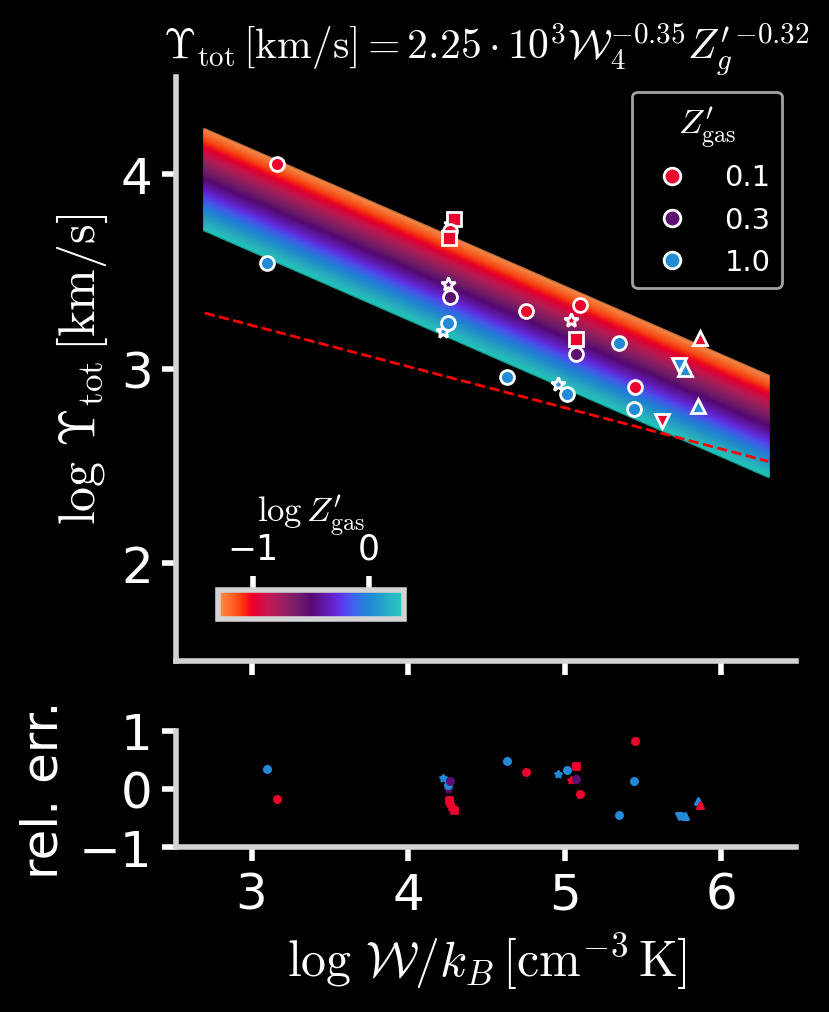

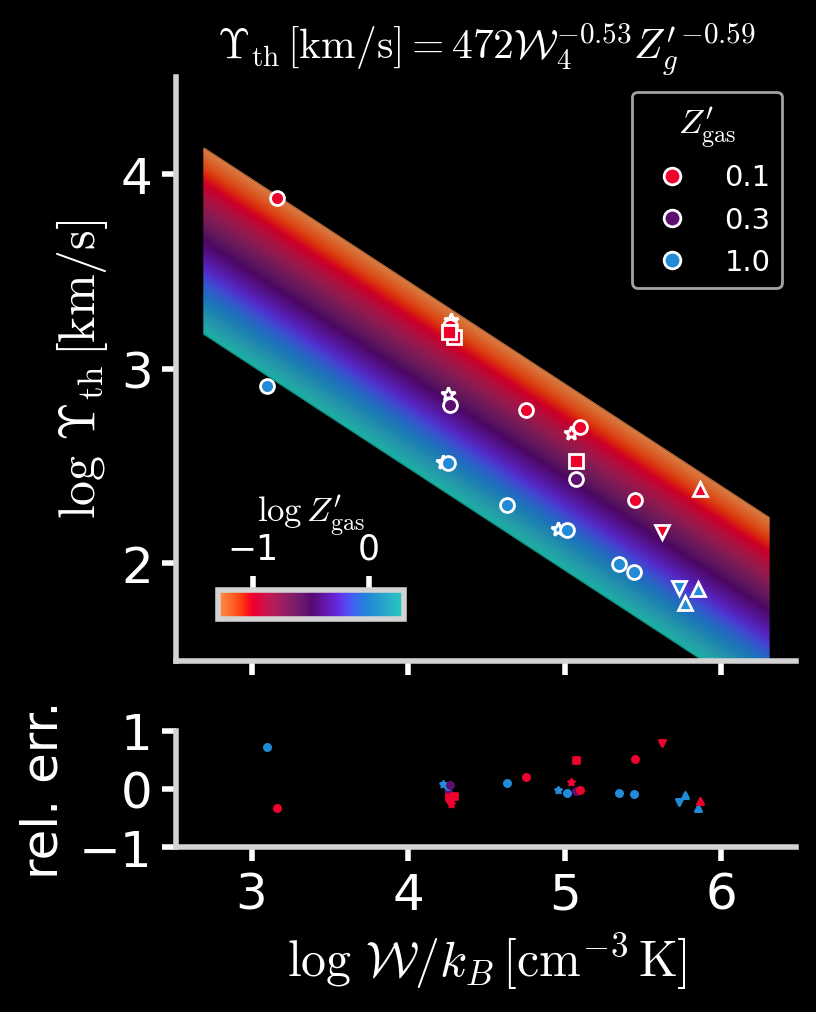

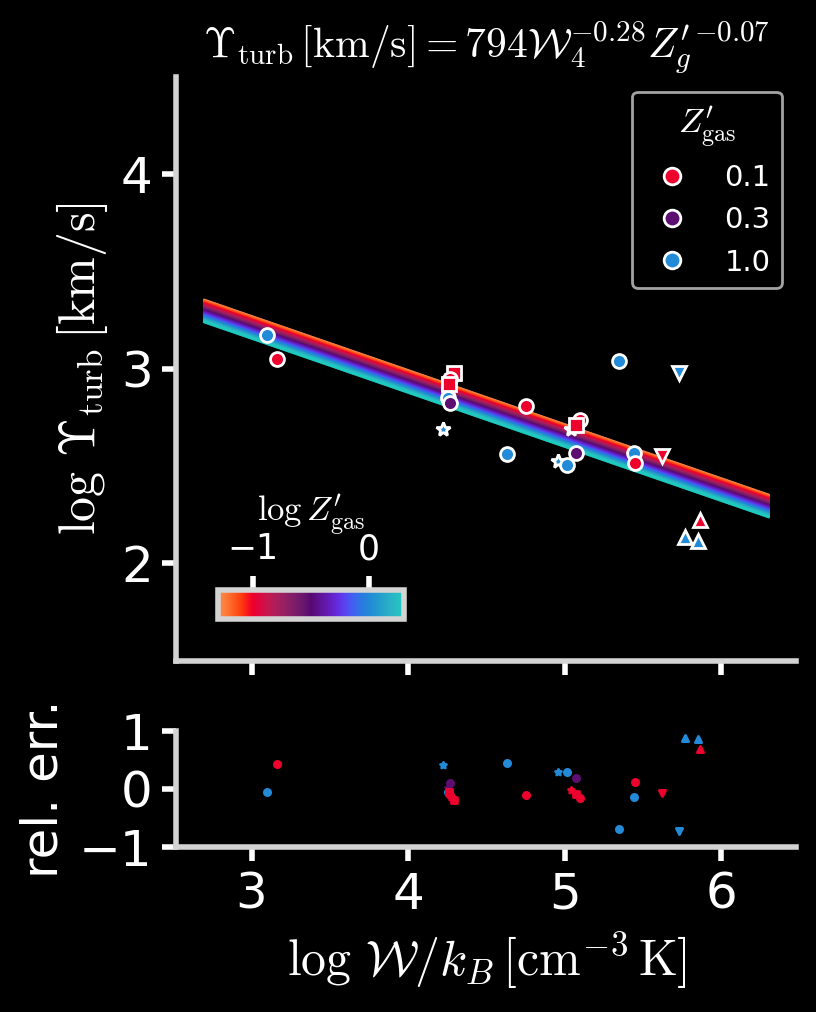

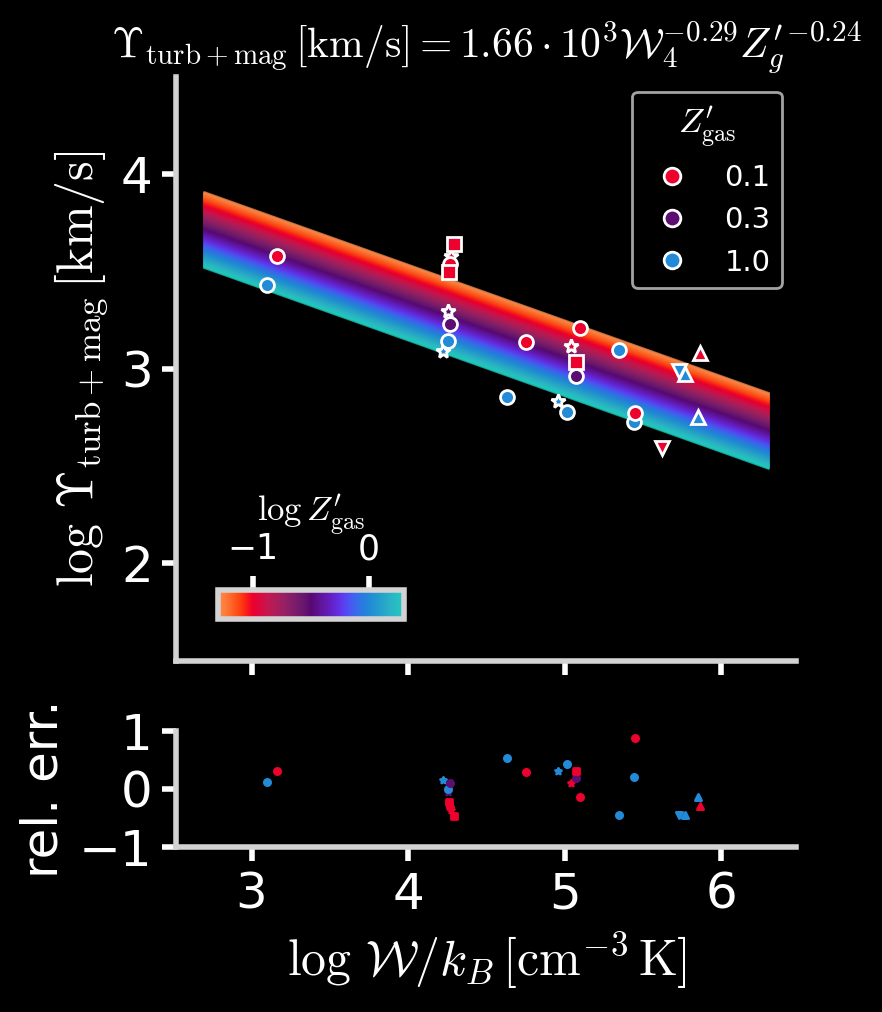

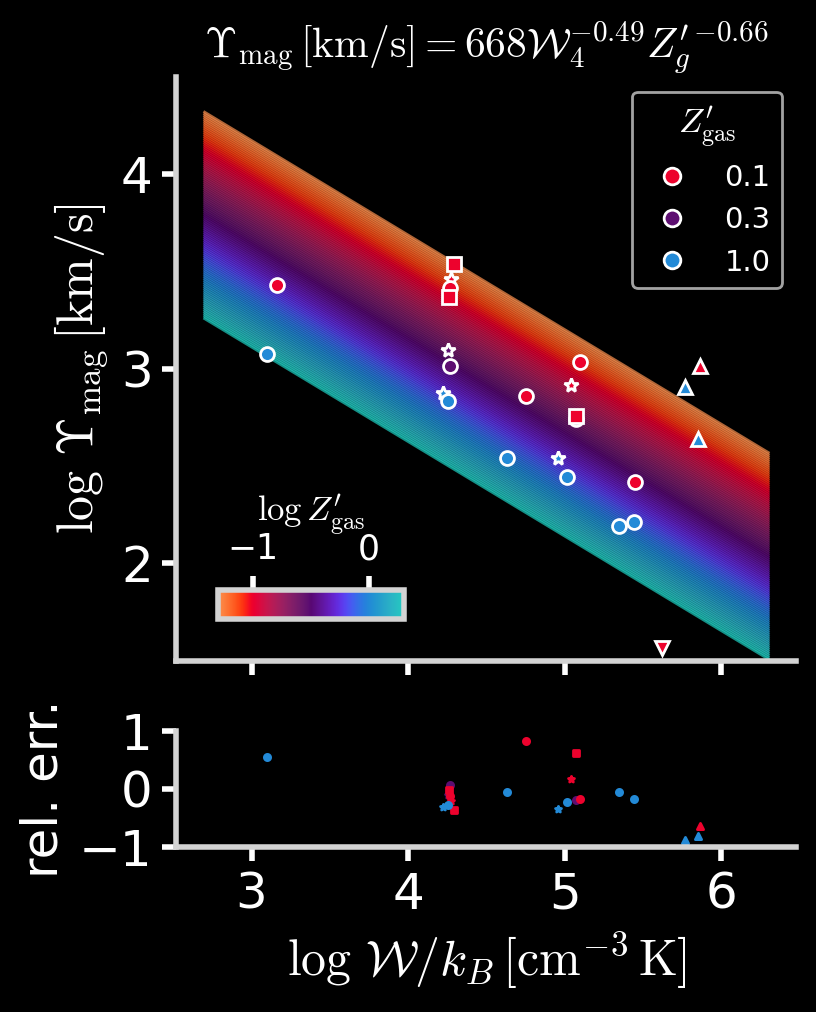

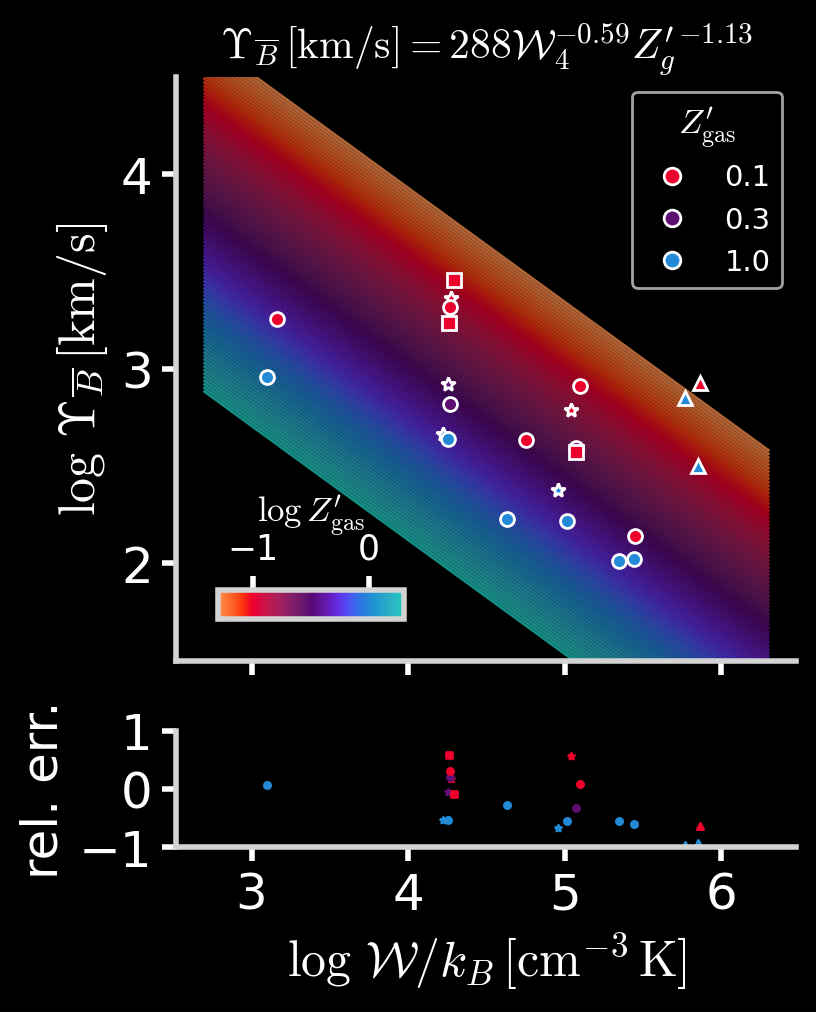

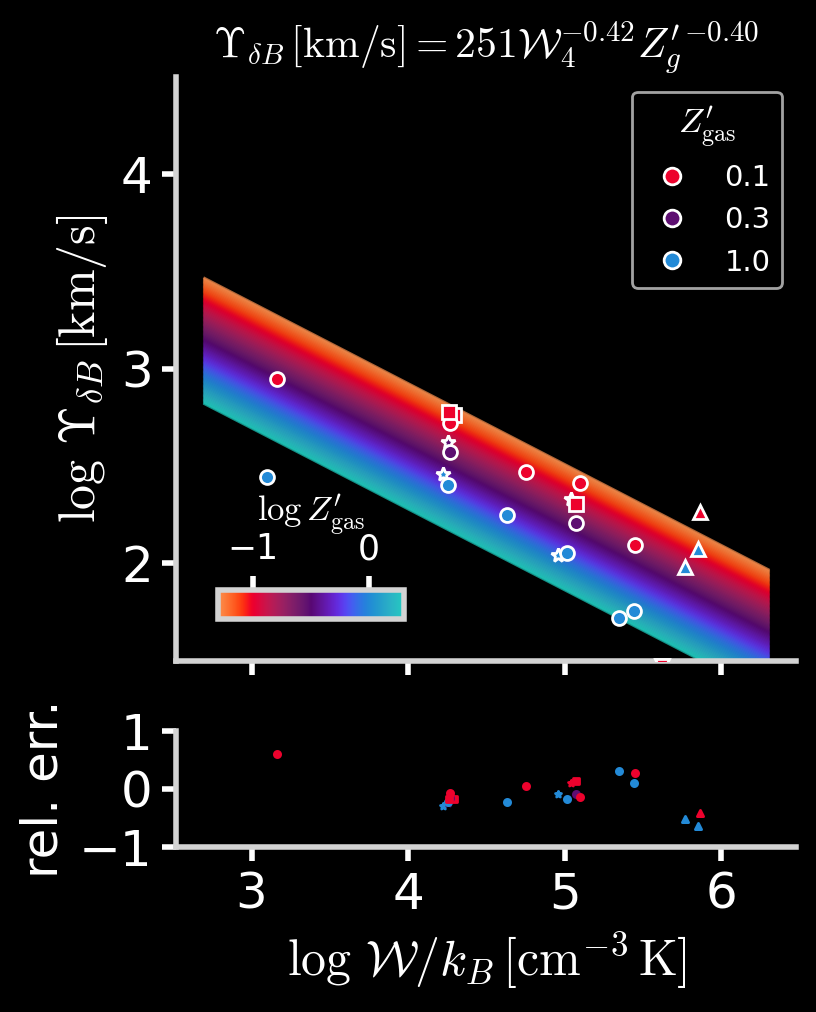

In [47]:
# Figure for feedback yields (each component saved into each figure)
for yf in ['Ytot','Yth','Yturb','Ynonth','Ymag','oYmag','dYmag']:
    fig,axes = plt.subplots(2,1,sharex='col',figsize=(4,5),gridspec_kw=dict(height_ratios=[1,0.2]))

    # set field names for x-axes and yaxis
    x1,x2=['W','Zgas']

    # linear regression
    odr_out = fit_odr(qdset,xf1=x1,xf2=x2,yf=yf)
    # construct model (not the x1-axis is not W and the parameter range is changed)
    model_dset = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,Wmin=Wmin,Wmax=Wmax,dims=[x2,x1])

    # plot simulation data along with fitting result
    plt.sca(axes[0])

    # write fitting result as the axis title
    a=odr_out.beta[1]
    b=odr_out.beta[2]
    Y0=10**odr_out.beta[0]*1.e4**a
    tit=labels[yf]+f'$={scifmt(Y0)} \\mathcal{{W}}_4^{{{a:5.2f}}}{{Z_g^\\prime}}^{{{b:5.2f}}}$'
    plt.title(tit,fontsize='small')

    # call plotting script
    plot_fitting_mean(qdset,model_dset,x1,yf,legend=1,colorbar=3,model=True)
    # plot all data as grey dots
    # plt.plot(pt_df[x1],pt_df[yf],'.',color='grey',alpha=0.1,mew=0,zorder=-1)
    plt.ylim((1.5,4.5))
    plt.xlabel('')

    # plot residual compared with the fitting result
    plt.sca(axes[1])
    print(yf)
    plot_fitting_mean(qdset,model_dset,x1,yf,residual=True,model=True)

    # decorate axis
    fig.axes[-1].xaxis.set_ticks_position('top')
    fig.axes[-1].xaxis.set_label_position('top')
    plt.setp(fig.axes[-1].get_xticklabels(),'fontsize','x-small')
    fig.axes[-1].set_xlabel(fig.axes[-1].get_xlabel(),fontsize='x-small')

    # TIGRESS-classic
    if yf == 'Ytot':
        w=model_dset.W.data
        plt.sca(axes[0])
        plt.plot(w, 3.86-0.212*w,ls='--',color='r',lw=1)
    # save figure
    plt.savefig(os.path.join(outdir,f'{yf}_fit.png'),bbox_inches='tight')

Beta: [ 4.77950412 -0.52648525 -0.59328964]
Beta Std Error: [0.15702443 0.03128173 0.04920877]
Beta Covariance: [[ 2.94562411 -0.57264484  0.24605037]
 [-0.57264484  0.11690266 -0.01976627]
 [ 0.24605037 -0.01976627  0.28928627]]
Residual Variance: 0.008370610588845582
Inverse Condition #: 0.0032243212459416837
Reason(s) for Halting:
  Sum of squares convergence
Beta: [ 4.36630627 -0.28656393 -0.24131985]
Beta Std Error: [0.24335454 0.04848587 0.07617964]
Beta Covariance: [[ 2.06331325 -0.4011822   0.171828  ]
 [-0.4011822   0.08190619 -0.01378513]
 [ 0.171828   -0.01378513  0.20219208]]
Residual Variance: 0.028702104406640387
Inverse Condition #: 0.0032237392834300596
Reason(s) for Halting:
  Sum of squares convergence
L1 : 0.3003369304968068
L2 : 0.39706951219832276


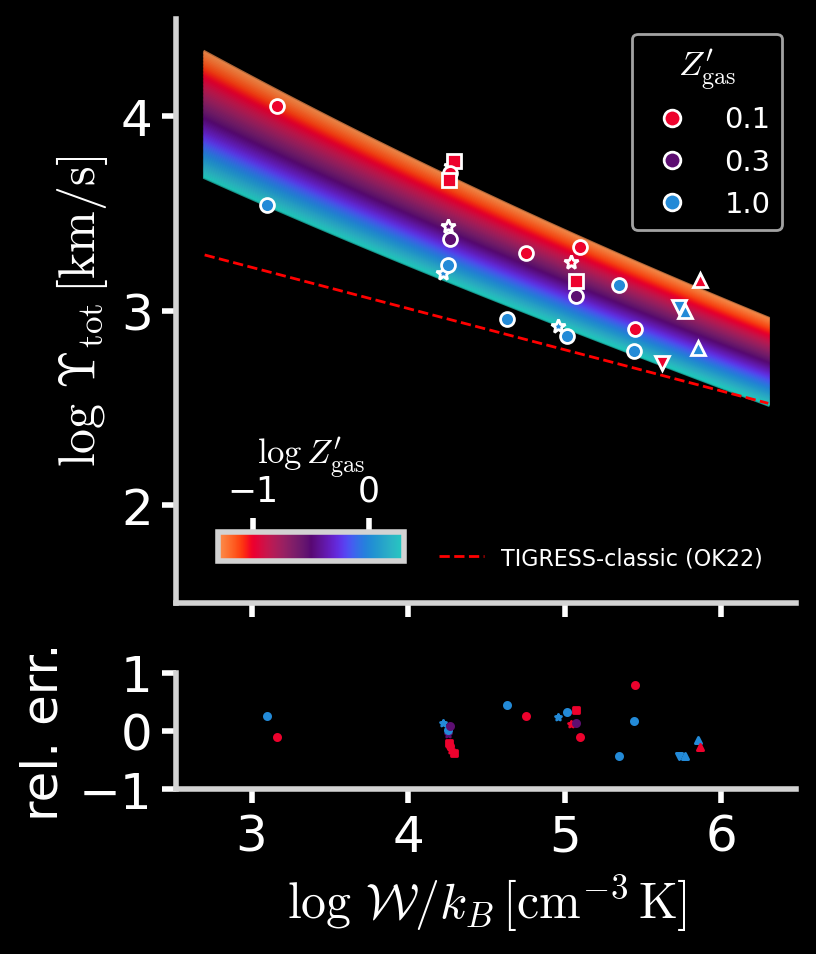

In [48]:
# Figure for total feedback yield compared with
# the model based on thermal + nonthermal (turbulent+magnetic)
fig,axes = plt.subplots(2,1,sharex='col',figsize=(4,5),gridspec_kw=dict(height_ratios=[1,0.2]))

x1,x2=['W','Zgas']

# fitting for thermal feedback yield
yf = 'Yth'
odr_out = fit_odr(qdset,xf1=x1,xf2=x2,yf=yf)
# construct model (not the x1-axis is not W and the parameter range is changed)
model_dset1 = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,Wmin=Wmin,Wmax=Wmax,dims=[x2,x1])

# fitting for non-thermal feedback yield
yf = 'Ynonth'
odr_out = fit_odr(qdset,xf1=x1,xf2=x2,yf=yf)
# construct model (not the x1-axis is not W and the parameter range is changed)
model_dset2 = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,Wmin=Wmin,Wmax=Wmax,dims=[x2,x1])

# get total feedback yield model by summing up two
model_dset = np.log10(10**model_dset1+10**model_dset2)

# plot results
plt.sca(axes[0])
plot_fitting_mean(qdset,model_dset,x1,'Ytot',legend=1,colorbar=3)
# plt.plot(pt_df[x1],pt_df['Ytot'],'.',color='grey',alpha=0.1,mew=0,zorder=-1)
# plt.ylim((5.e1,2.e4))
plt.ylim(1.5,4.5)

plt.sca(axes[1])
plot_fitting_mean(qdset,model_dset,x1,'Ytot',residual=True)

axes[0].set_xlabel('')
fig.axes[-1].xaxis.set_ticks_position('top')
fig.axes[-1].xaxis.set_label_position('top')
plt.setp(fig.axes[-1].get_xticklabels(),'fontsize','x-small')
fig.axes[-1].set_xlabel(fig.axes[-1].get_xlabel(),fontsize='x-small')


# add reference line from the previous result (Ostriker & Kim 2022 Eq 27, Figure 14)
w=model_dset.W.data
plt.sca(axes[0])
plt.plot(w, 3.86-0.212*w,ls='--',color='r',lw=1)
leg1=plt.gca().get_legend()
custom_lines2 = [Line2D([0], [0], ls = '--', color='r', lw=1)]
leg2 = plt.legend(custom_lines2,['TIGRESS-classic (OK22)'],loc=4,borderpad=1,
                  fontsize=8,frameon=False)
plt.gca().add_artist(leg1)

plt.savefig(os.path.join(outdir,f'Ytot_fit2.png'),bbox_inches='tight')

In [49]:
import astropy.units as au
import astropy.constants as ac
yield_conv = ((au.cm**(-3)*au.K*ac.k_B)/(ac.M_sun/ac.kpc**2/au.yr)).to('km/s').value

In [50]:
qdset_ = qdset.to_dataset('variable')
for yf in ['Ytot','Yth','Yturb','Ymag','oYmag','dYmag']:
    qdset_[yf] = qdset_[yf.replace('Y','Pi' if 'mag' in yf else 'P')]/qdset_['sfr']*yield_conv
qdset_['Ynonth'] = (qdset_['Pturb']+qdset_['Pimag'])/qdset_['sfr']*yield_conv

Beta: [ 4.39421371 -0.28877526 -0.24014634]
Beta Std Error: [0.17855664 0.03556592 0.05584599]
Beta Covariance: [[ 2.06337681 -0.40109516  0.17269869]
 [-0.40109516  0.08186431 -0.01400413]
 [ 0.17269869 -0.01400413  0.20184154]]
Residual Variance: 0.01545160097477207
Inverse Condition #: 0.0032230031777006262
Reason(s) for Halting:
  Sum of squares convergence
Ytot
L1 : 0.2308835162164084
L2 : 0.3540017765401516
Beta: [ 4.47050301 -0.46344014 -0.49865176]
Beta Std Error: [0.11942223 0.02378568 0.03736839]
Beta Covariance: [[ 2.64531614 -0.51417644  0.22174413]
 [-0.51417644  0.10493936 -0.01799868]
 [ 0.22174413 -0.01799868  0.25900964]]
Residual Variance: 0.005391290936560247
Inverse Condition #: 0.0032232420117713797
Reason(s) for Halting:
  Sum of squares convergence
Yth
L1 : 0.14657305970028842
L2 : 0.2240903560896533
Beta: [ 3.65524674 -0.21658762  0.00410215]
Beta Std Error: [0.21581868 0.04297583 0.06737663]
Beta Covariance: [[ 1.8950984  -0.3683052   0.15941989]
 [-0.3683052  

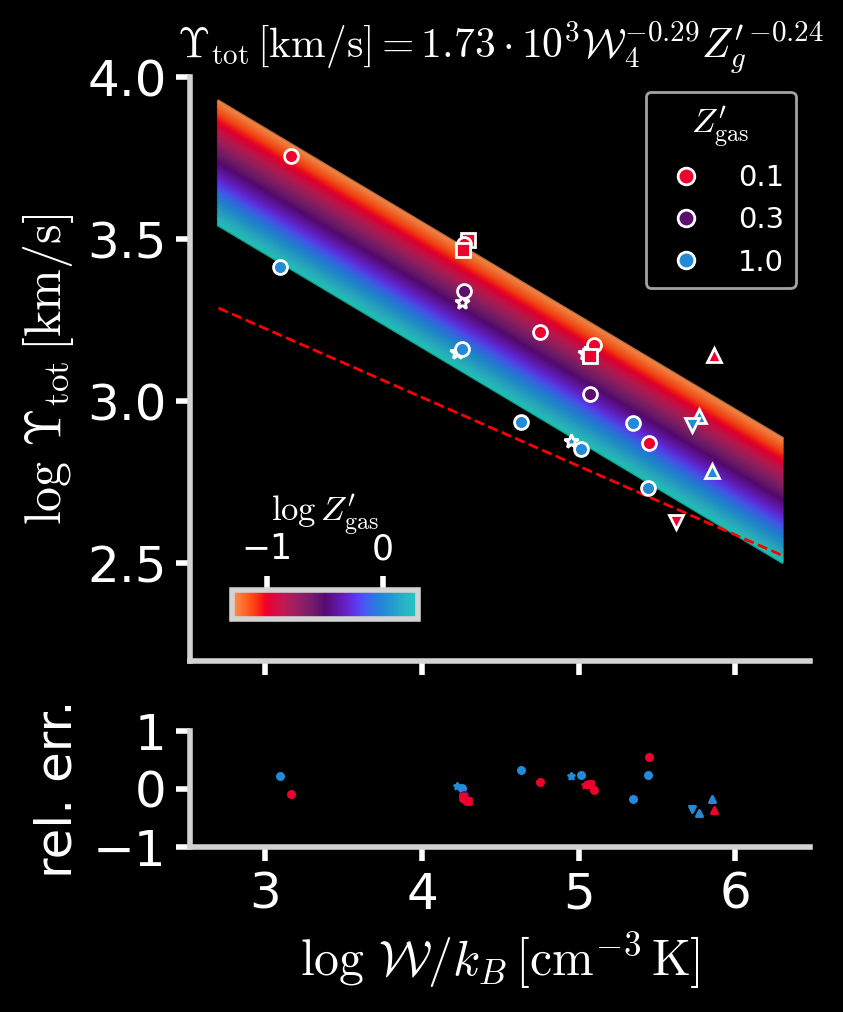

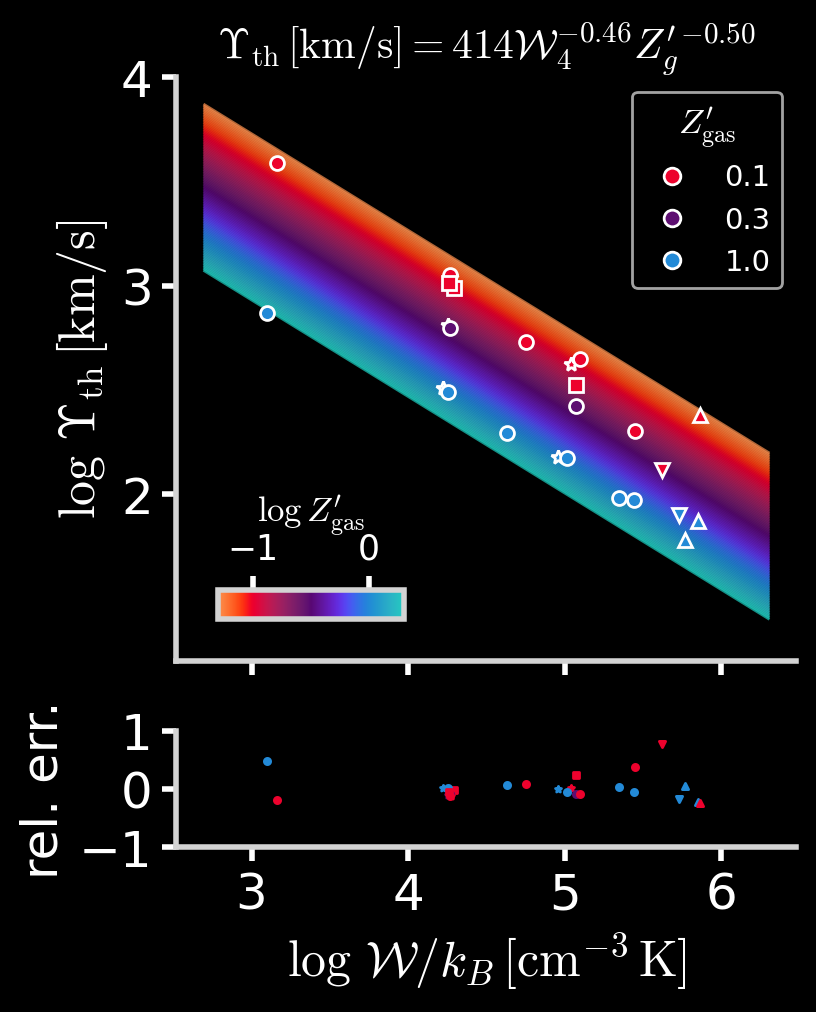

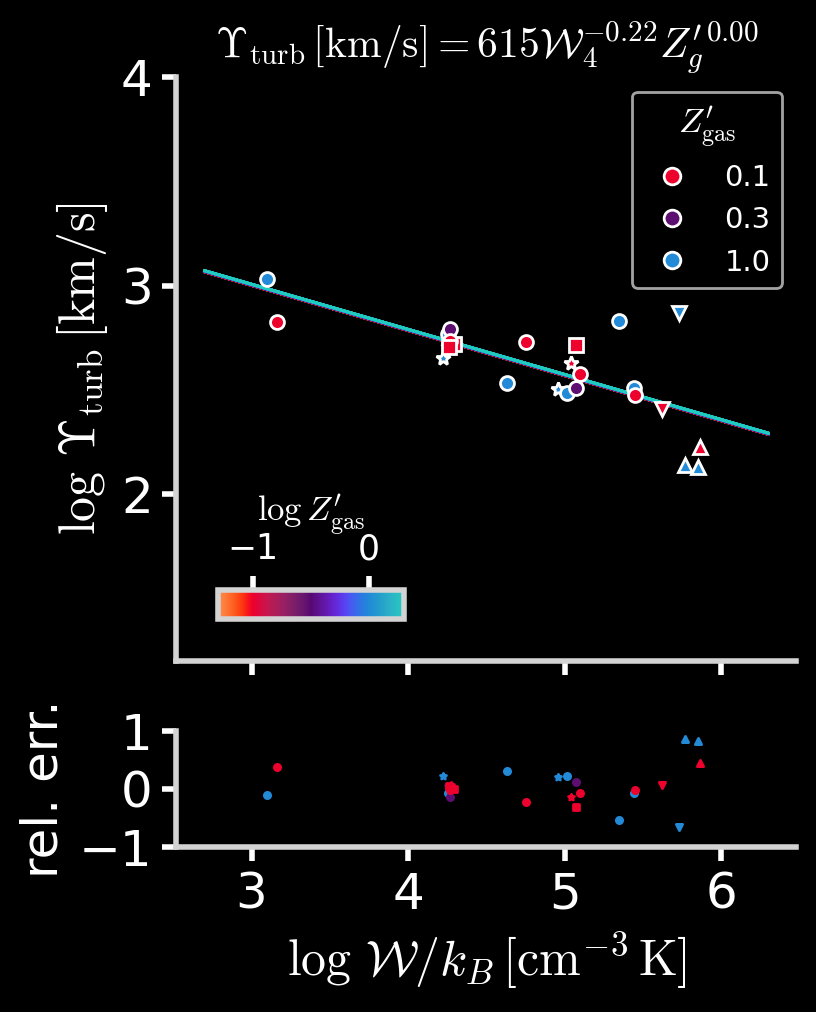

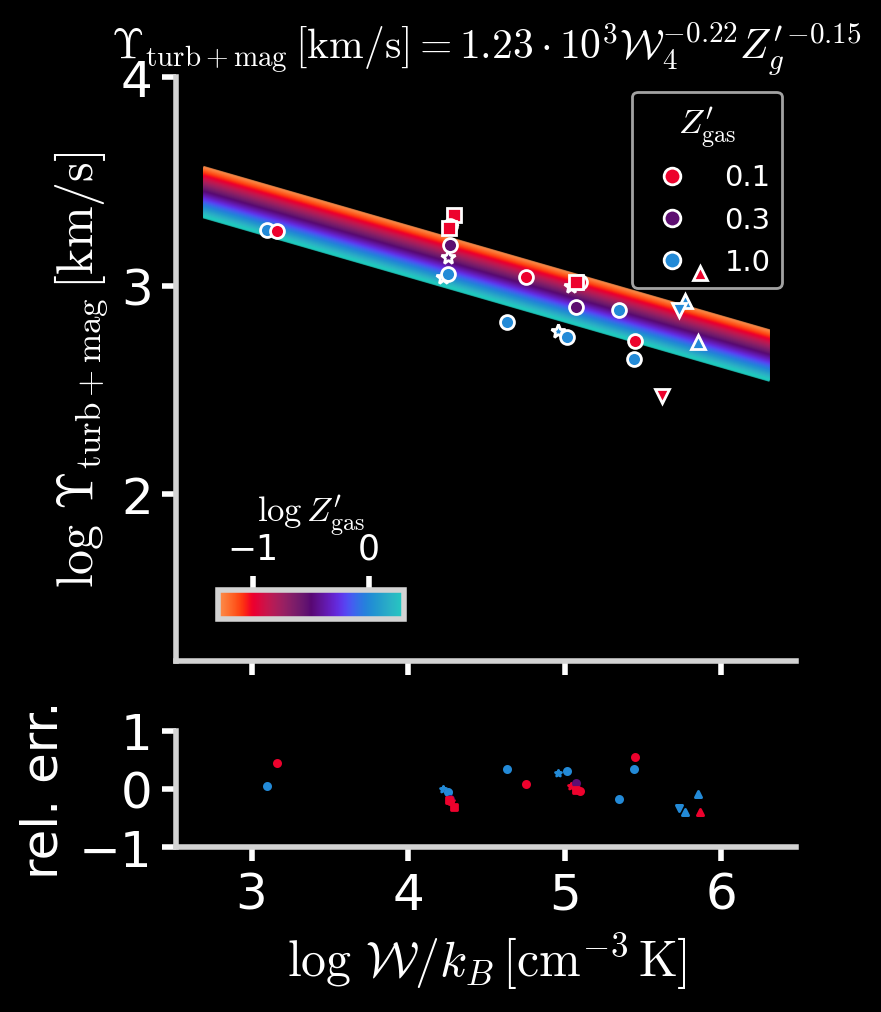

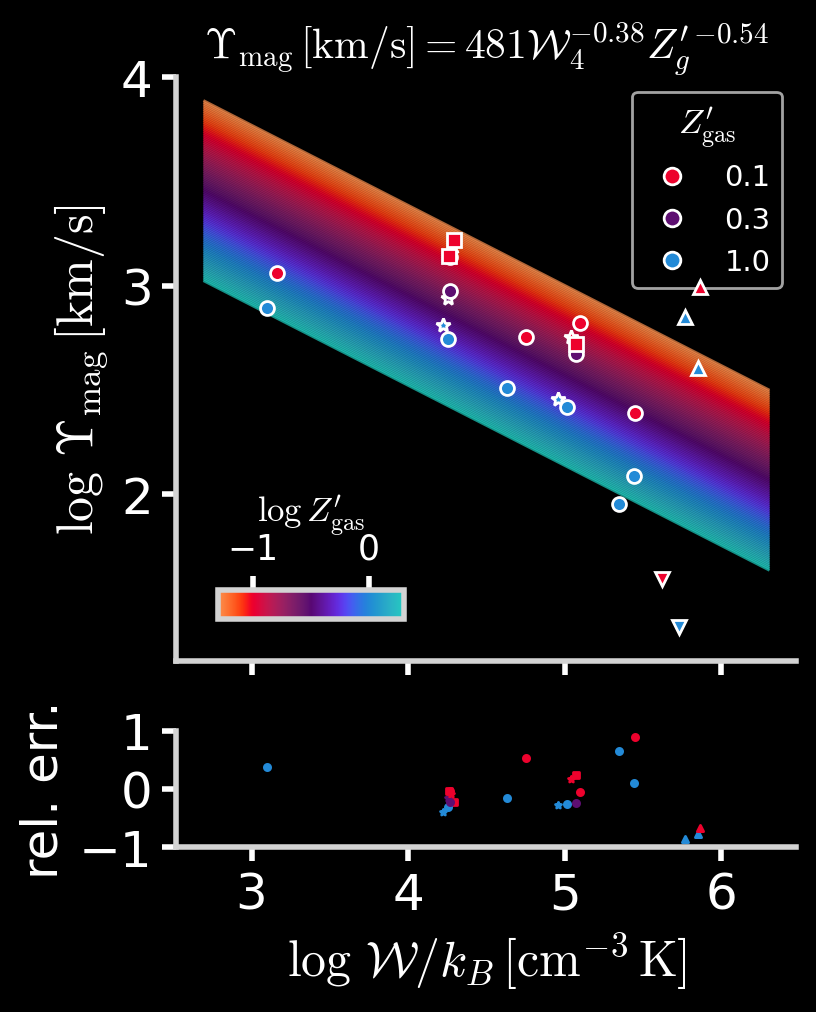

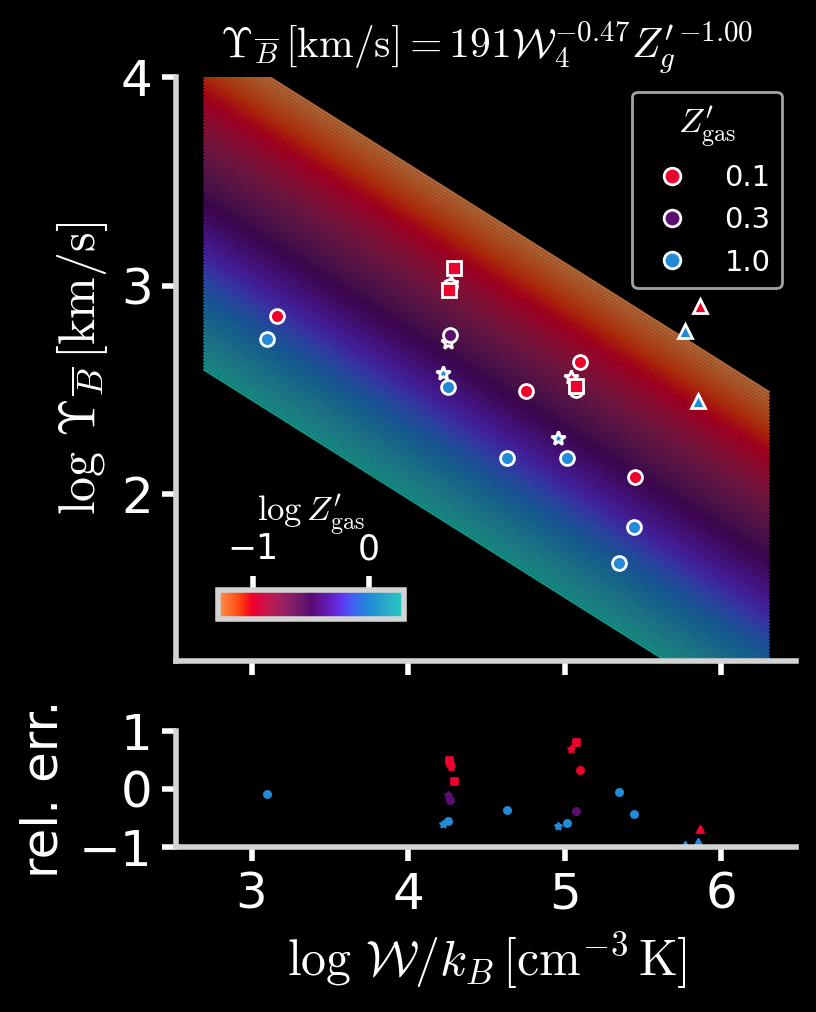

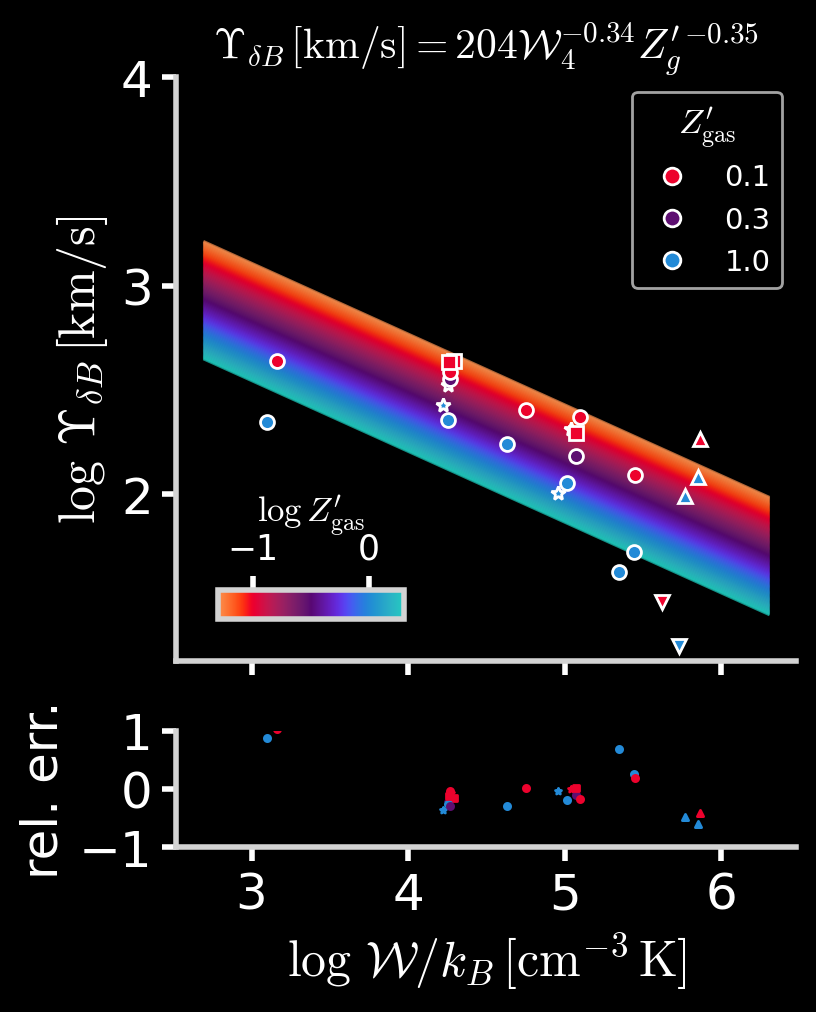

In [51]:
# Figure for feedback yields (each component saved into each figure)
for yf in ['Ytot','Yth','Yturb','Ynonth','Ymag','oYmag','dYmag']:
    fig,axes = plt.subplots(2,1,sharex='col',figsize=(4,5),gridspec_kw=dict(height_ratios=[1,0.2]))

    # set field names for x-axes and yaxis
    x1,x2=['W','Zgas']

    # linear regression
    odr_out = fit_odr(qdset_.to_array(),xf1=x1,xf2=x2,yf=yf)
    # construct model (not the x1-axis is not W and the parameter range is changed)
    model_dset = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,Wmin=Wmin,Wmax=Wmax,dims=[x2,x1])

    # plot simulation data along with fitting result
    plt.sca(axes[0])

    # write fitting result as the axis title
    a=odr_out.beta[1]
    b=odr_out.beta[2]
    Y0=10**odr_out.beta[0]*1.e4**a
    tit=labels[yf]+f'$={scifmt(Y0)} \\mathcal{{W}}_4^{{{a:5.2f}}}{{Z_g^\\prime}}^{{{b:5.2f}}}$'
    plt.title(tit,fontsize='small')

    # call plotting script
    plot_fitting_mean(qdset_.to_array(),model_dset,x1,yf,legend=1,colorbar=3,model=True)
    # plot all data as grey dots
    # plt.plot(pt_df[x1],pt_df[yf],'.',color='grey',alpha=0.1,mew=0,zorder=-1)
    plt.ylim((1.2,4.))
    if yf == 'Ytot': plt.ylim((2.2,4.))
    plt.xlabel('')

    # plot residual compared with the fitting result
    plt.sca(axes[1])
    print(yf)
    plot_fitting_mean(qdset_.to_array(),model_dset,x1,yf,residual=True,model=True)

    # decorate axis
    fig.axes[-1].xaxis.set_ticks_position('top')
    fig.axes[-1].xaxis.set_label_position('top')
    plt.setp(fig.axes[-1].get_xticklabels(),'fontsize','x-small')
    fig.axes[-1].set_xlabel(fig.axes[-1].get_xlabel(),fontsize='x-small')

    # TIGRESS-classic
    if yf == 'Ytot':
        w=model_dset.W.data
        plt.sca(axes[0])
        plt.plot(w, 3.86-0.212*w,ls='--',color='r',lw=1)
    # save figure
    plt.savefig(os.path.join(outdir,f'{yf}_mean_fit.png'),bbox_inches='tight')

Beta: [ 4.47050301 -0.46344014 -0.49865176]
Beta Std Error: [0.11942223 0.02378568 0.03736839]
Beta Covariance: [[ 2.64531614 -0.51417644  0.22174413]
 [-0.51417644  0.10493936 -0.01799868]
 [ 0.22174413 -0.01799868  0.25900964]]
Residual Variance: 0.005391290936560247
Inverse Condition #: 0.0032232420117713797
Reason(s) for Halting:
  Sum of squares convergence
Beta: [ 3.95746183 -0.21690858 -0.14962089]
Beta Std Error: [0.19772865 0.0393811  0.06180416]
Beta Covariance: [[ 1.93375651 -0.37587129  0.16210213]
 [-0.37587129  0.07670759 -0.01320233]
 [ 0.16210213 -0.01320233  0.18892877]]
Residual Variance: 0.020217963041295153
Inverse Condition #: 0.00322246259716918
Reason(s) for Halting:
  Sum of squares convergence
L1 : 0.21583573413213336
L2 : 0.3379270348117972


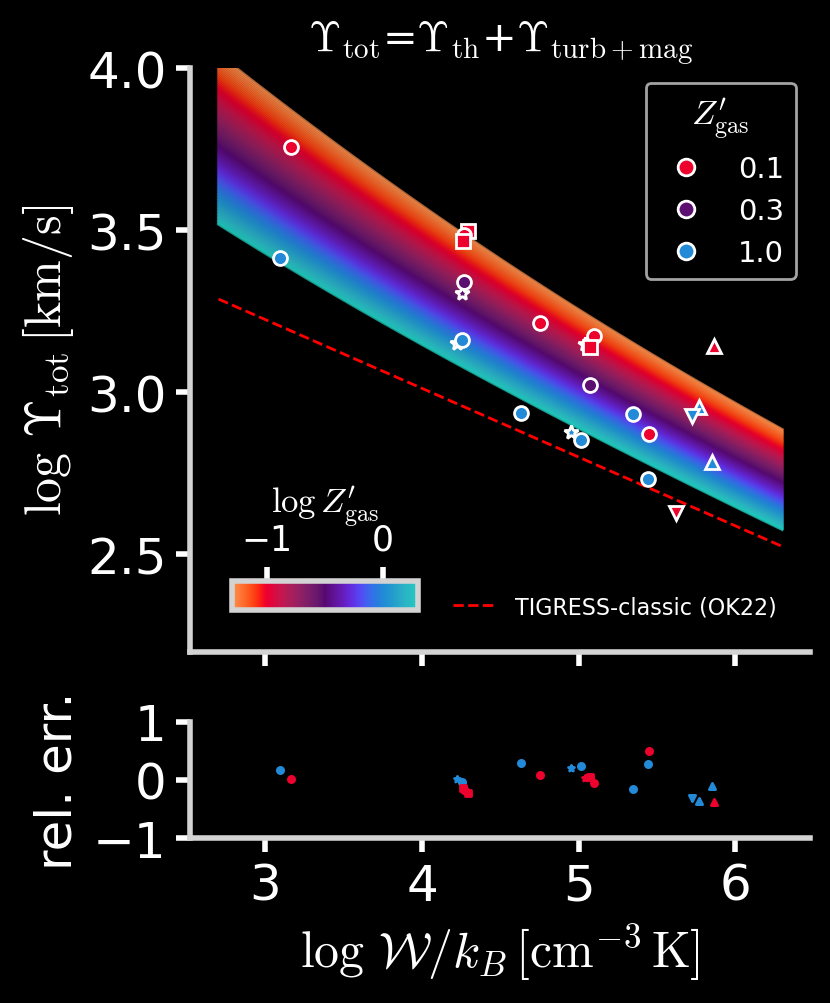

In [52]:
# Figure for total feedback yield compared with
# the model based on thermal + nonthermal (turbulent+magnetic)
fig,axes = plt.subplots(2,1,sharex='col',figsize=(4,5),gridspec_kw=dict(height_ratios=[1,0.2]))

x1,x2=['W','Zgas']

# fitting for thermal feedback yield
yf = 'Yth'
odr_out = fit_odr(qdset_.to_array(),xf1=x1,xf2=x2,yf=yf)
# construct model (not the x1-axis is not W and the parameter range is changed)
model_dset1 = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,Wmin=Wmin,Wmax=Wmax,dims=[x2,x1])

# fitting for non-thermal feedback yield
yf = 'Ynonth'
odr_out = fit_odr(qdset_.to_array(),xf1=x1,xf2=x2,yf=yf)
# construct model (not the x1-axis is not W and the parameter range is changed)
model_dset2 = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,Wmin=Wmin,Wmax=Wmax,dims=[x2,x1])

# get total feedback yield model by summing up two
model_dset = np.log10(10**model_dset1+10**model_dset2)

# plot results
plt.sca(axes[0])
plot_fitting_mean(qdset_.to_array(),model_dset,x1,'Ytot',legend=1,colorbar=3)
# plt.plot(pt_df[x1],pt_df['Ytot'],'.',color='grey',alpha=0.1,mew=0,zorder=-1)
# plt.ylim((5.e1,2.e4))
plt.ylim(2.2,4.)
tit=labels['Ytot'][:-16]+'='+labels['Yth'][:-16]+'+'+labels['Ynonth'][:-16]
plt.title(tit,fontsize='small')

plt.sca(axes[1])
plot_fitting_mean(qdset_.to_array(),model_dset,x1,'Ytot',residual=True)

axes[0].set_xlabel('')
fig.axes[-1].xaxis.set_ticks_position('top')
fig.axes[-1].xaxis.set_label_position('top')
plt.setp(fig.axes[-1].get_xticklabels(),'fontsize','x-small')
fig.axes[-1].set_xlabel(fig.axes[-1].get_xlabel(),fontsize='x-small')


# add reference line from the previous result (Ostriker & Kim 2022 Eq 27, Figure 14)
w=model_dset.W.data
plt.sca(axes[0])
plt.plot(w, 3.86-0.212*w,ls='--',color='r',lw=1)
leg1=plt.gca().get_legend()
custom_lines2 = [Line2D([0], [0], ls = '--', color='r', lw=1)]
leg2 = plt.legend(custom_lines2,['TIGRESS-classic (OK22)'],loc=4,borderpad=1,
                  fontsize=8,frameon=False)
plt.gca().add_artist(leg1)

plt.savefig(os.path.join(outdir,f'Ytot_mean_fit2.png'),bbox_inches='tight')

In [53]:
# fitting for thermal feedback yield
yf = 'Yturb'
odr_out = fit_odr(qdset_.to_array(),xf1=x1,xf2=x2,yf=yf)
# construct model (not the x1-axis is not W and the parameter range is changed)
model_dsett = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,Wmin=Wmin,Wmax=Wmax,dims=[x2,x1])

Beta: [ 3.65524674 -0.21658762  0.00410215]
Beta Std Error: [0.21581868 0.04297583 0.06737663]
Beta Covariance: [[ 1.8950984  -0.3683052   0.15941989]
 [-0.3683052   0.07514538 -0.01310309]
 [ 0.15941989 -0.01310309  0.18470227]]
Residual Variance: 0.02457798616846529
Inverse Condition #: 0.003219432822190876
Reason(s) for Halting:
  Sum of squares convergence


Beta: [-5.10724363  2.37666482  0.27784576]
Beta Std Error: [0.20698842 0.13300008 0.0956511 ]
Beta Covariance: [[ 3.78248733 -2.25101972  0.64714486]
 [-2.25101972  1.56166979 -0.12147125]
 [ 0.64714486 -0.12147125  0.80772841]]
Residual Variance: 0.011326992452052036
Inverse Condition #: 0.017730162596443635
Reason(s) for Halting:
  Sum of squares convergence


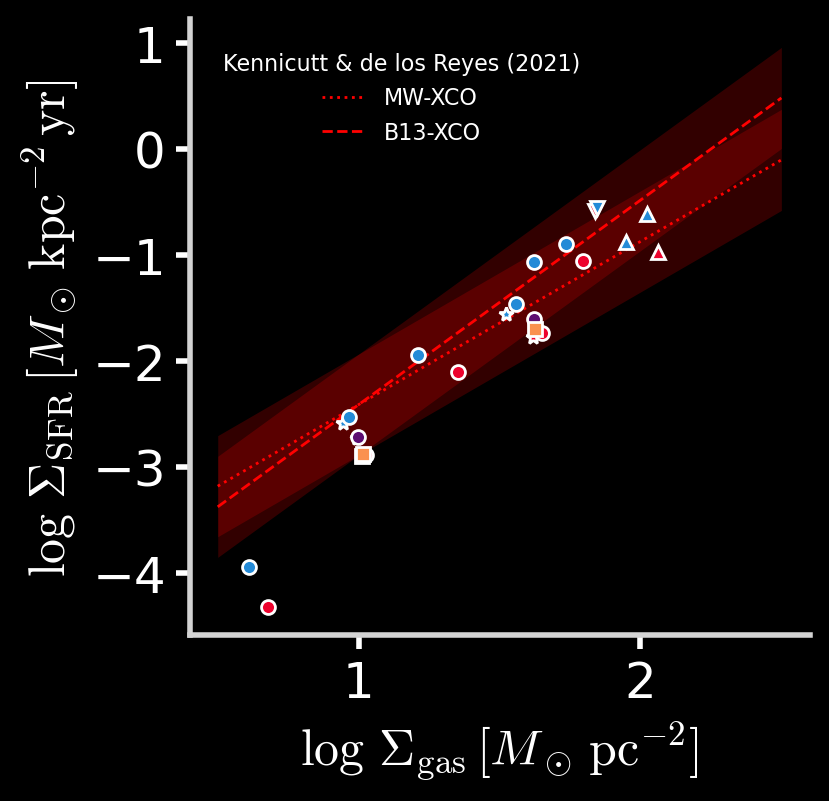

In [54]:
# Figure for weight and Ptot showing off parameter coverage
fig,ax = plt.subplots(1,1,figsize=(4,4))

# set field names for x-axes and yaxis
# here we fit Ptot as a function of nH and Zgas
x1,x2,yf=['Sigma_gas','Zdust','sfr']

# linear regression
odr_out = fit_odr(qdset_.to_array(),xf1=x1,xf2=x2,yf=yf)
# construct model (not the x1-axis is not W and the parameter range is changed)
model_dset = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,Wmin=0.5,Wmax=2.5,dims=[x2,x1])

# plot simulation data along with fitting result
plt.sca(ax)
# call plotting script
plot_fitting_mean(qdset_.to_array(),model_dset,x1,yf,model=False,legend=1)
# plot_fitting_points(qdset,model_dset,x1,yf,legend=4,colorbar=0,model=False)
# plot all data as grey dots
# plt.plot(pt_df[x1],pt_df[yf],'.',color='grey',alpha=0.1,mew=0,zorder=-1)
Sigma=10.**model_dset.Sigma_gas.data
KS_sfr1 = Sigma**1.54*10**(-3.95)
KS_sfr2 = Sigma**1.93*10**(-4.34)
plt.plot(np.log10(Sigma),np.log10(KS_sfr1),ls=':',color='r',lw=1)
plt.fill_between(np.log10(Sigma),
                 np.log10(KS_sfr1)-np.log10(3),
                 np.log10(KS_sfr1)+np.log10(3),color='r',alpha=0.2,lw=0)
plt.plot(np.log10(Sigma),np.log10(KS_sfr2),ls='--',color='r',lw=1)
plt.fill_between(np.log10(Sigma),np.log10(KS_sfr2)-np.log10(3),
                 np.log10(KS_sfr2)+np.log10(3),color='r',alpha=0.2,lw=0)

# leg1=plt.gca().get_legend()
custom_lines2 = [Line2D([0], [0], ls = ':', color='r', lw=1),
                 Line2D([0], [0], ls = '--', color='r', lw=1)]
leg2 = plt.legend(custom_lines2,
                  ['MW-XCO','B13-XCO'],
                  title='Kennicutt & de los Reyes (2021)',
                  title_fontsize=8,
                  loc=2,borderpad=1,fontsize=8,frameon=False)
# plt.gca().add_artist(leg1)
# # decorate axis
# fig.axes[-1].xaxis.set_ticks_position('top')
# fig.axes[-1].xaxis.set_label_position('top')
# plt.setp(fig.axes[-1].get_xticklabels(),'fontsize','x-small')
# fig.axes[-1].set_xlabel(fig.axes[-1].get_xlabel(),fontsize='x-small')

# save figure
plt.savefig(os.path.join(outdir,'KS.png'),bbox_inches='tight',dpi=300)

In [55]:
W_sfr_conv=((ac.k_B*au.K/au.cm**3)/(au.km/au.s)).to('M_sun/kpc^2/yr').value

Beta: [-8.20943878  1.32879918  0.23251103]
Beta Std Error: [0.20687868 0.04118069 0.05311033]
Beta Covariance: [[ 5.17234496 -1.00689939  0.37282841]
 [-1.00689939  0.20494781 -0.0356005 ]
 [ 0.37282841 -0.0356005   0.34088979]]
Residual Variance: 0.008274542495373637
Inverse Condition #: 0.003183410580125086
Reason(s) for Halting:
  Sum of squares convergence


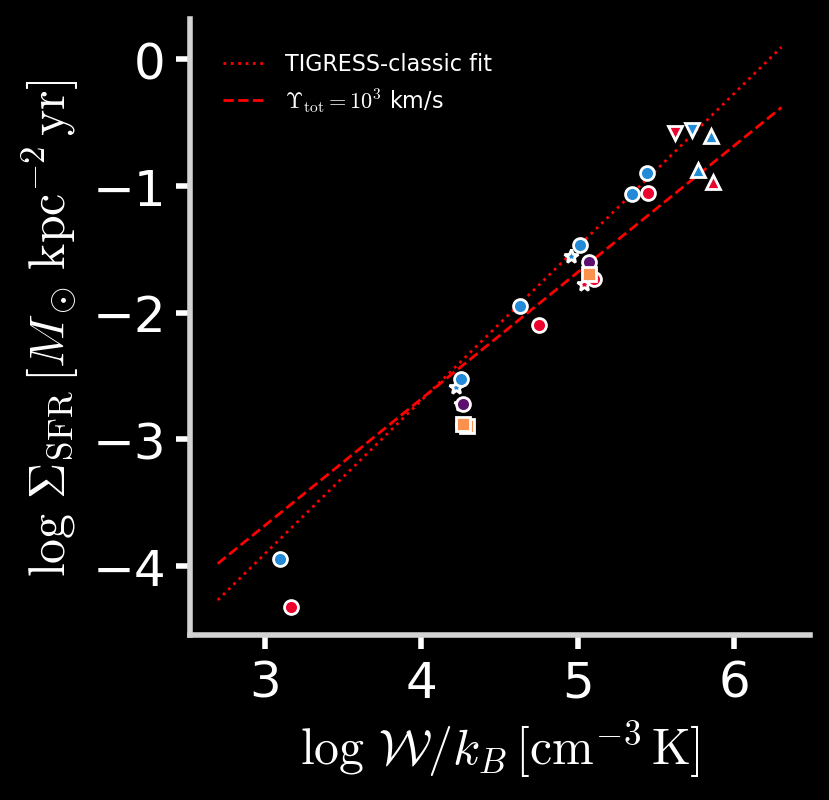

In [56]:
# Figure for weight and Ptot showing off parameter coverage
fig,ax = plt.subplots(1,1,figsize=(4,4))

# set field names for x-axes and yaxis
# here we fit Ptot as a function of nH and Zgas
x1,x2,yf=['W','Zdust','sfr']

# linear regression
odr_out = fit_odr(qdset_.to_array(),xf1=x1,xf2=x2,yf=yf)
# construct model (not the x1-axis is not W and the parameter range is changed)
model_dset = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,Wmin=Wmin,Wmax=Wmax,dims=[x2,x1])

# plot simulation data along with fitting result
plt.sca(ax)
# call plotting script
plot_fitting_mean(qdset_.to_array(),model_dset,x1,yf,model=False,legend=1)
# plot_fitting_points(qdset,model_dset,x1,yf,legend=4,colorbar=0,model=False)
# plot all data as grey dots
# plt.plot(pt_df[x1],pt_df[yf],'.',color='grey',alpha=0.1,mew=0,zorder=-1)
W=model_dset.W.data
plt.plot(W,W+np.log10(W_sfr_conv/1.e3),ls='--',color='r',lw=1)
plt.plot(W,W+np.log10(W_sfr_conv)-3.86+0.212*(W),ls=':',color='r',lw=1)
# leg1=plt.gca().get_legend()
custom_lines2 = [Line2D([0], [0], ls = ':', color='r', lw=1),
                 Line2D([0], [0], ls = '--', color='r', lw=1)]
leg2 = plt.legend(custom_lines2,
                  [r'TIGRESS-classic fit',r'$\Upsilon_{\rm tot}=10^3$ km/s'],
                  loc=2,borderpad=1,fontsize=8,frameon=False)
# plt.gca().add_artist(leg1)
# # decorate axis
# fig.axes[-1].xaxis.set_ticks_position('top')
# fig.axes[-1].xaxis.set_label_position('top')
# plt.setp(fig.axes[-1].get_xticklabels(),'fontsize','x-small')
# fig.axes[-1].set_xlabel(fig.axes[-1].get_xlabel(),fontsize='x-small')
# plt.xlim(1.e3,1.e6)
# plt.ylim(1.e-4,1)
# save figure
plt.savefig(os.path.join(outdir,'PRFM.png'),bbox_inches='tight')

In [ ]:
from pyathena.plt_tools.utils import texteffect


def plot_box_comparison(sa,ms,ts,wf,reduced=None,legend=[0.1,.95]):
    if len(np.atleast_1d(ts)) == 1: ts = [ts]*len(ms)
    tf = 'nH'
    nmodel = len(ms)
    w = 0.8/nmodel
    offset = np.arange(nmodel+1)/nmodel*0.8-0.4 + 0.5*w
    edge_color = plt.rcParams['axes.edgecolor']
    for i,m in enumerate(ms):
        s = sa.set_model(m)
        data, colors, labels = plot_1Dpdf_tevol(getattr(s.pdf,tf)[wf].sel(time=ts[i]), s.pdf.phdef,
                                                reduced=wf if reduced is None else reduced)
        box=plt.boxplot(data,positions=np.arange(len(data))+offset[i],widths=w,
                        whis=[16,84],showfliers=False,
                        patch_artist=True,medianprops=dict(color=edge_color),
#                         showmeans=True,
#                         meanprops=dict(markerfacecolor='tab:orange',markeredgecolor='w',
#                                        markersize=5,markeredgewidth=0.5,
#                                        marker='*')
                       )

        for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
            plt.setp(box[element], color=edge_color)
        plt.setp(box['boxes'],'facecolor',pdata.colors[m])
#         pdata.colors[m]='C{}'.format(i)
        s.color = pdata.colors[m]
        if legend:
            x0=0.95
            dx=0.015
            y0=0.95
            dy=0.08

            c = s.color
            plt.annotate('             ',(x0,y0-dy*i),xycoords='axes fraction',
                         ha='center',va='top',size=8,
                         backgroundcolor=c,color=c)
            plt.annotate(m.replace('_','-'),(x0,y0-dy*i),xycoords='axes fraction',
                         ha='center',va='top',**texteffect(8,linewidth=2, foreground=plt.rcParams['axes.facecolor']))
    plt.xticks(ticks=np.arange(len(labels)),labels=labels)
    for d, c, l, xc in zip(data, colors, labels, np.arange(len(data))):
        plt.axvspan(xc-0.5,xc+0.5,color=c,alpha=0.3,lw=0)
#     plt.yscale('log')
    plt.ylim(0,1)
    plt.xlim(-0.5,len(data)-0.5)


In [38]:
s = pdata.sa.set_model(pdata.mlist[0])

NameError: name 'pdata' is not defined

In [39]:
zp = s.read_zprof_new(flist=['A','d'])
shorthands = s.get_phase_shorthand()
rename_dict=dict()
for i,pname in enumerate(shorthands):
    rename_dict['phase{}'.format(i+1)] = pname
zp = zp.to_array().to_dataset('phase').rename(rename_dict)
torb = s.torb_Myr
if s.torb_Myr <50:
    trange = slice(torb*5,torb*15)
elif s.torb_Myr >300:
    trange = slice(torb*1.5,torb*5)
else:
    trange = slice(torb*2,torb*5)
zp = zp.to_array('phase').to_dataset('variable').sel(z=slice(-300,300),time=trange)
zpw = zp.sel(phase=['c','u','w1','w2','h1','h2']).sum(dim='phase')
zp_Cold = zp.sel(phase=['cmm','cnm']).sum(dim='phase')
zp_UNM = zp.sel(phase=['unm','uim']).sum(dim='phase')
zp_ph = zp.sel(phase=['wnm','wpim','wcim','h1','h2'])
zp_ph = xr.concat([zp_Cold.assign_coords(phase=['Cold']),zp_UNM.assign_coords(phase=['unm']),zp_ph],dim='phase')
volume=(zp_ph['A'].sum(dim='z')/zpw['A'].sum(dim='z')).quantile([0.16,0.5,0.84],dim='time')
mass=(zp_ph['d'].sum(dim='z')/zpw['d'].sum(dim='z')).quantile([0.16,0.5,0.84],dim='time')

NameError: name 's' is not defined

In [ ]:
        box=plt.boxplot(data,positions=np.arange(len(data))+offset[i],widths=w,
                        whis=[16,84],showfliers=False,
                        patch_artist=True,medianprops=dict(color=edge_color),
                       )

In [34]:
model_dset = np.log10(10**model_dset1+10**model_dset2)

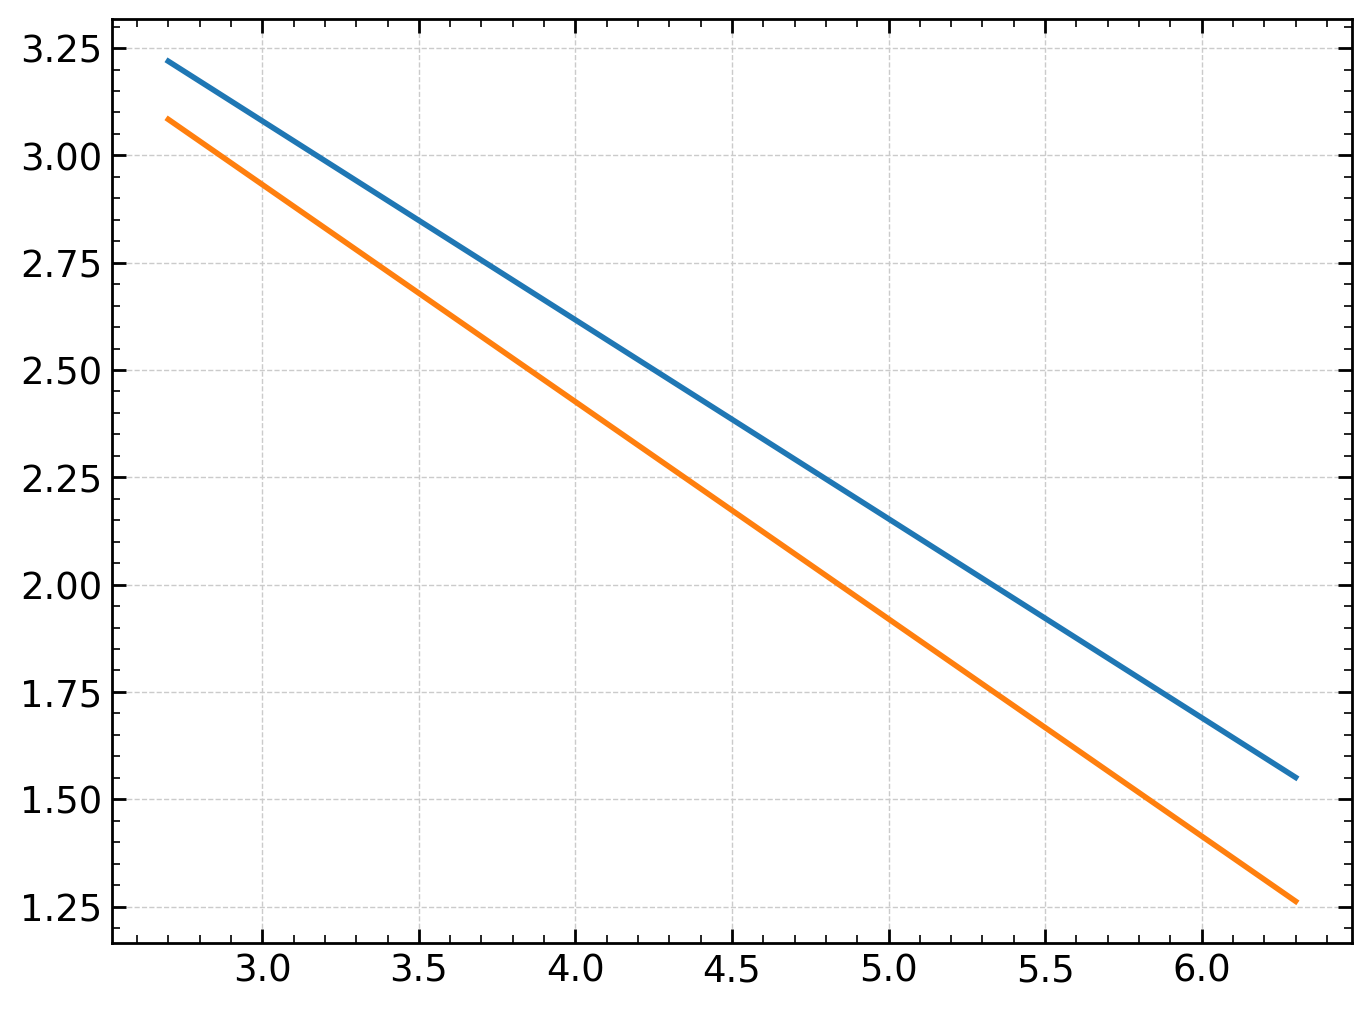

In [45]:
plt.plot(model_dset.W,model_dset1.interp(Zgas=0))
plt.plot(w,(4.45-0.506*w))

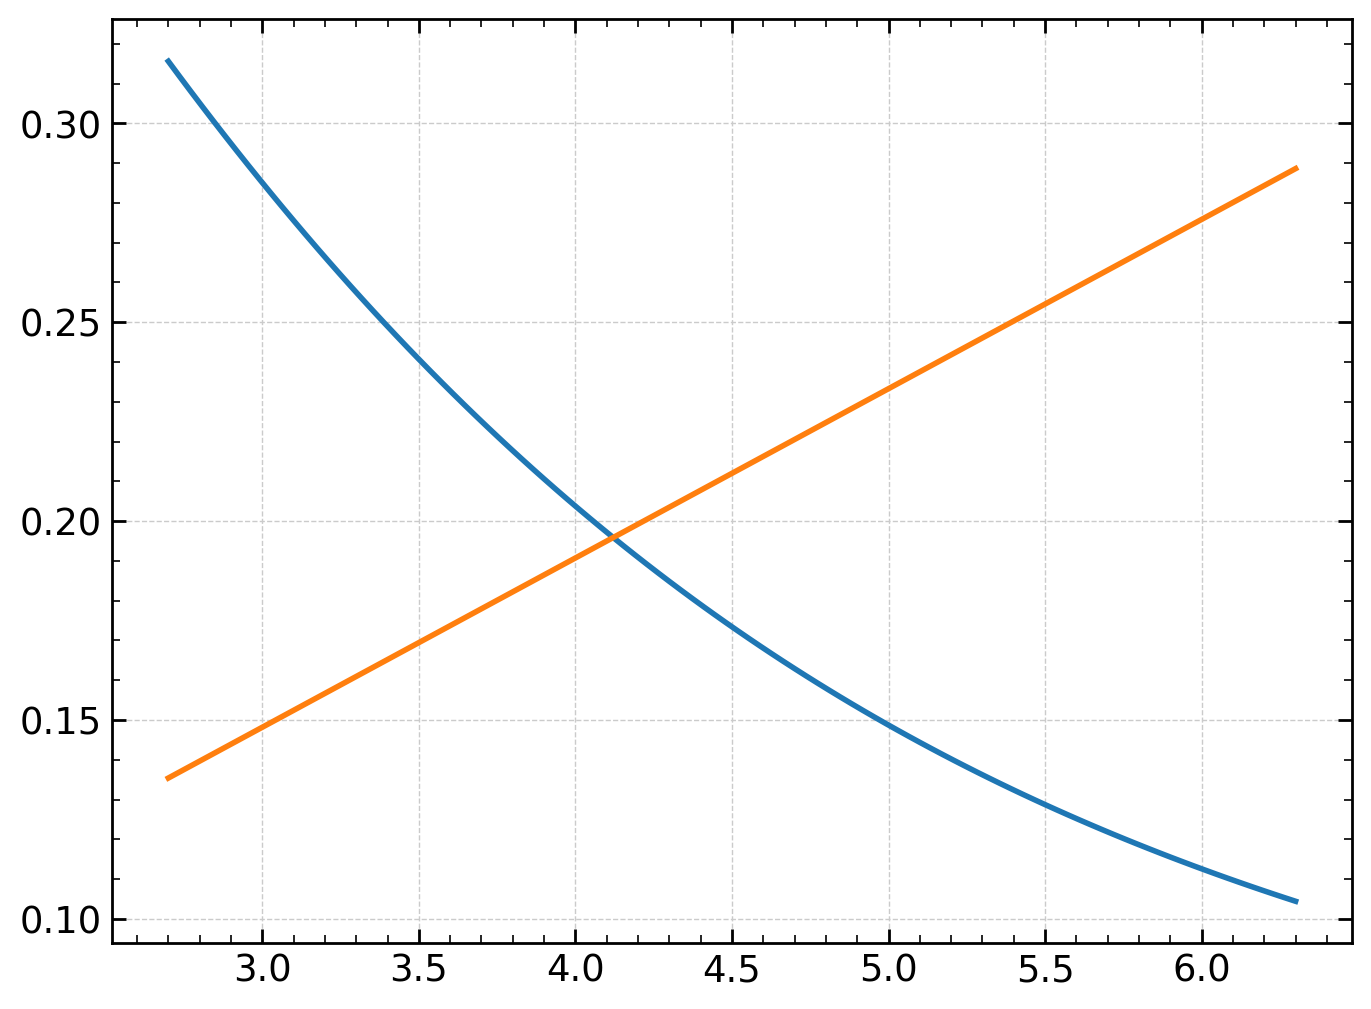

In [46]:
plt.plot(model_dset.W,model_dset.interp(Zgas=0)-(3.86-0.212*w))
plt.plot(model_dset.W,model_dset1.interp(Zgas=0)-(4.45-0.506*w))
# plt.plot(w,3.86-0.212*w)